Simulated dataset for decision tree illustration

In [48]:
import sys
import sklearn
import pandas as pd 
import numpy as np 
import os 
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 


In [49]:

import random 
random.seed(28)
age =np.random.binomial(n=20,p=0.05, size=1000)
age2=np.random.binomial(n=20,p=0.2, size=1000)
age3=np.random.binomial(n=20,p=0.5, size=1000)
age4=np.random.binomial(n=20,p=0.75, size=500)
age5=np.random.binomial(n=20,p=0.95, size=500)

np.unique(age, return_counts=True)
# np.unique(age2, return_counts=True)
np.unique(age3, return_counts=True)
np.unique(age4, return_counts=True)
np.unique(age5, return_counts=True)
ageveh=np.concatenate((age, age2,age3,age4,age5))
claim=np.concatenate((np.repeat(1,1000), np.repeat(0,1000), np.repeat(1,1000), np.repeat(0,500), np.repeat(1,500)))
ageveh.shape 
claim.shape 

#we must now re arrange the data into a dataframe 

dataset=pd.DataFrame({'Claim':claim, 'Vehicle Age': ageveh})
dataset 
yes=dataset.loc[dataset['Claim']==0, 'Vehicle Age'].value_counts()
no=dataset.loc[dataset['Claim']==1, 'Vehicle Age'].value_counts()
yes=yes.sort_index()
no=no.sort_index()
yes.head(10)
no.head(10)
ind=list(range(4000))
rnd=random.sample(ind, k=4000)
len(rnd)

dataset=dataset.reindex(rnd)

dataset['PolicyID']=ind 
dataset=dataset.set_index(keys='PolicyID')
#dataset.reset_index()

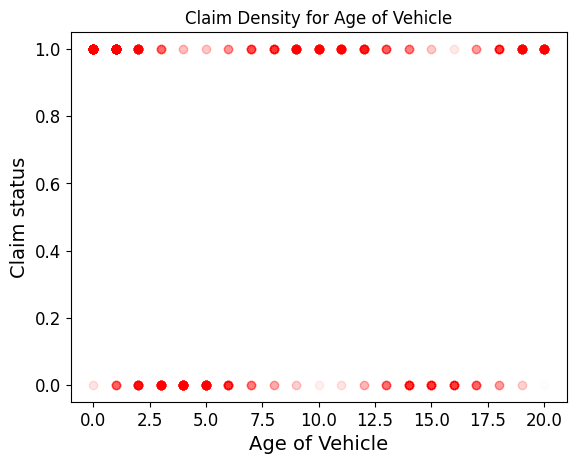

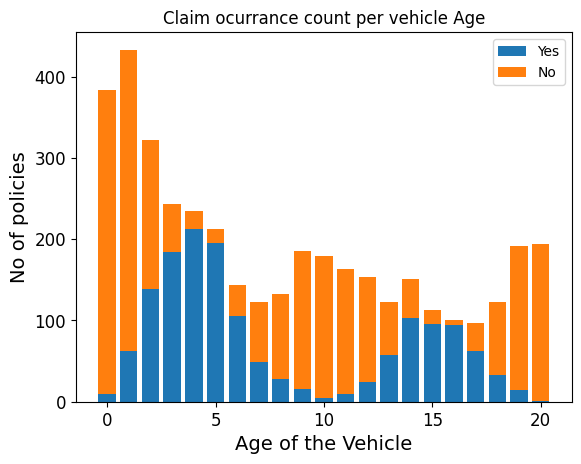

In [50]:
dataset
fig, ax=plt.subplots()
ax.scatter(dataset['Vehicle Age'], dataset['Claim'], alpha=0.01, color='r')
ax.set_xlabel('Age of Vehicle')
ax.set_ylabel('Claim status')
ax.set_title('Claim Density for Age of Vehicle')
plt.show()

type(yes)

yesno=pd.merge(left=yes, right=no, how='outer', left_index=True, right_index=True)
yesno.columns=['Yes','No']
yesno=yesno.fillna(0)
yesno['Yes']=yesno['Yes'].astype('int64')
yesno
fig, ax=plt.subplots()
ax.bar(yesno.index, yesno['Yes'], label='Yes')
ax.bar(yesno.index, yesno['No'], bottom=yesno['Yes'], label='No')
ax.set_ylabel('No of policies')
ax.set_xlabel('Age of the Vehicle')
ax.set_title('Claim ocurrance count per vehicle Age')
ax.legend()

[Text(0.2857142857142857, 0.9, 'x[0] <= 1.5\ngini = 0.471\nsamples = 2800\nvalue = [1061, 1739]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.166\nsamples = 570\nvalue = [52, 518]'),
 Text(0.42857142857142855, 0.7, 'x[0] <= 6.5\ngini = 0.495\nsamples = 2230\nvalue = [1009, 1221]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.401\nsamples = 812\nvalue = [587, 225]'),
 Text(0.5714285714285714, 0.5, 'x[0] <= 12.5\ngini = 0.418\nsamples = 1418\nvalue = [422, 996]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.246\nsamples = 639\nvalue = [92, 547]'),
 Text(0.7142857142857143, 0.3, 'x[0] <= 17.5\ngini = 0.488\nsamples = 779\nvalue = [330, 449]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.417\nsamples = 416\nvalue = [293, 123]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.183\nsamples = 363\nvalue = [37, 326]')]

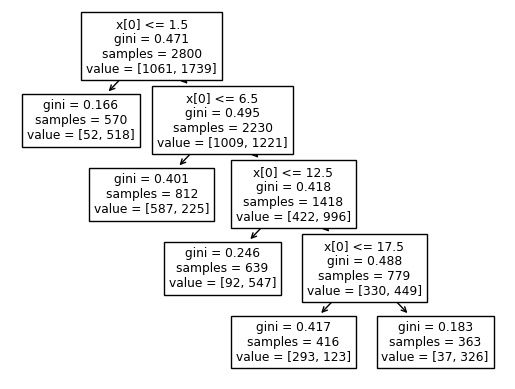

In [51]:
#Decision Tree for Classification

from sklearn import tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

X=dataset['Vehicle Age'].to_numpy().reshape(-1,1)
y=dataset['Claim'].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
clf=tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)

clf=clf.fit(X_train, y_train)
tree.plot_tree(clf)

In [52]:
#French Motor TPL 

# import sys
# import sklearn 
# import pandas as pd 
# import numpy as np 
# import os
np.random.seed(42)

# import matplotlib as mpl 
# import matplotlib.pyplot as plt 
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier

freMTPLfreq=pd.read_csv('/content/freMTPLfreq.csv', index_col='PolicyID')
freMTPLsev=pd.read_csv('/content/freMTPLsev.csv', index_col='PolicyID')

#Basic Exploratory Data Analysis 

freqs0=freMTPLfreq 
freqs0.head(10)

freMTPLfreq['Brand'].value_counts()
freqs0.describe()

freqs0['DriverAge'].value_counts().sort_index()[70:] 
#delete all values above 50, probably outliers 


freqs0[['Power', 'Brand', 'Gas', 'Region']]=freqs0[['Power', 'Brand', 'Gas', 'Region']].astype('category')
freqs0.info()

freqs0['Brand'].cat.categories 

#Additional feature versions are introduced :

freqs0['DensityS']=freqs0['Density']/1000 
freqs0['DriverAgeB']=pd.cut(freqs0.DriverAge, bins=[0,23.5,69.5,100], labels=['18-23', '24-69','70+'])
#운전자연령 범주화 
freqs0['Frequency']=freqs0['ClaimNb']/freqs0['Exposure']
# 리스크=[청구건수/가입기간]*[청구액/청구빈도]= 청구건수*청구액

#Claim Amounts preprocessing 

# claims1.Loc[claims1['ClaimAmount']>10_000, 'ClaimAmount']=10_000
outclaims=freMTPLsev[freMTPLsev['ClaimAmount']>10_000]
claims=freMTPLsev[freMTPLsev['ClaimAmount']<=10_000]
claims.shape 

print(f'Total initial claim amounts where {freMTPLsev.shape[0]}')
print(f'Total initial claim amounts are {claims.shape[0]}')
print(f'The outlier Claims where {outclaims.shape[0]}, which is a {outclaims.shape[0]/freMTPLsev.shape[0]:.2%} of the total dataset')

corrector=outclaims.groupby(level=0).count()
corrector['ClaimAmount']

freqs=freqs0.copy()
freqs0.loc[corrector.index, 'ClaimNb']

#we correct the frequencies based on the infomation from the filtered outcounts to maintain data integrity 

freqs.loc[corrector.index, 'ClaimNb']=freqs0.loc[corrector.index, 'ClaimNb']-corrector['ClaimAmount']
freqs.loc[corrector.index, 'ClaimNb']

freqs['ClaimNb'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413169 entries, 1 to 413169
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   ClaimNb    413169 non-null  int64   
 1   Exposure   413169 non-null  float64 
 2   Power      413169 non-null  category
 3   CarAge     413169 non-null  int64   
 4   DriverAge  413169 non-null  int64   
 5   Brand      413169 non-null  category
 6   Gas        413169 non-null  category
 7   Region     413169 non-null  category
 8   Density    413169 non-null  int64   
dtypes: category(4), float64(1), int64(4)
memory usage: 20.5 MB
Total initial claim amounts where 16181
Total initial claim amounts are 15906
The outlier Claims where 275, which is a 1.70% of the total dataset


15906

In [53]:
#Renaming categories 

freqs['Brand'] = freqs['Brand'].cat.rename_categories({'Fiat':'Fi', 'Japanese (except Nissan) or Korean':'J-{N}/K',
'Mercedes, Chrysler or BMW':'MChB', 'Opel, \
General Motors or Ford':'OGmF',
'Renault, Nissan or Citroen':'RNC', 'Volksw\
agen, Audi, Skoda or Seat':'VASkSe', 'other':'other'})

freqs['Region'] = freqs['Region'].cat.rename_categories({"Aquitaine":"Aq", "Basse-Normandie":"BN", 
"Bretagne":"Br", "Centre":"Ce",
"Haute-Normandie":"HN", "Ile-de-France":"IdF",
 "Limousin":"L", "Nord-Pas-de-Calais":"NPdC",
"Pays-de-la-Loire":"PdlL", "Poitou-Charentes":"PC"})


#Simplifying categories

freqs['PowerSmpl']=freqs.Power.astype(str)
freqs.loc[freqs['PowerSmpl']=='e', 'PowerSmpl']='eg'
freqs.loc[freqs['PowerSmpl']=='g', 'PowerSmpl']='eg'
freqs.loc[freqs['PowerSmpl']=='l', 'PowerSmpl']='klmno'
freqs.loc[freqs['PowerSmpl']=='m', 'PowerSmpl']='klmno'
freqs.loc[freqs['PowerSmpl']=='n', 'PowerSmpl']='klmno'
freqs.loc[freqs['PowerSmpl']=='o', 'PowerSmpl']='klmno'
freqs.loc[freqs['PowerSmpl']=='k', 'PowerSmpl']='klmno'
freqs['PowerSmpl']=freqs.PowerSmpl.astype('category')
freqs['PowerSmpl'].value_counts()

freqs["RegionSmpl"] = freqs.Region.astype(str)
freqs.loc[freqs['RegionSmpl']=='Br', 'RegionSmpl']='BrBNHN'
freqs.loc[freqs['RegionSmpl']=='BN', 'RegionSmpl']='BrBNHN'
freqs.loc[freqs['RegionSmpl']=='HN', 'RegionSmpl']='BrBNHN'
freqs.loc[freqs['RegionSmpl']=='L', 'RegionSmpl']='LNPdC'
freqs.loc[freqs['RegionSmpl']=='NPdC', 'RegionSmpl']='LNPdC'
freqs['RegionSmpl']=freqs.RegionSmpl.astype('category')
freqs['RegionSmpl'].value_counts()

freqs.Region.value_counts()

freqs["BrandSmpl"] = freqs.Brand.astype(str)
freqs.loc[freqs["BrandSmpl"]=="RNC", "BrandSmpl"] = "RNC_J-{N}/k"
freqs.loc[freqs["BrandSmpl"]=="J-{N}/K", "BrandSmpl"] = "RNC_J-{N}/k"
freqs.loc[freqs["BrandSmpl"]=="MChB", "BrandSmpl"] = "MChB_OGmF"
freqs.loc[freqs["BrandSmpl"]=="OGmF", "BrandSmpl"] = "MChB_OGmF"
freqs["BrandSmpl"] = freqs.BrandSmpl.astype("category")
freqs["BrandSmpl"].value_counts()

RNC_J-{N}/k    297260
MChB_OGmF       56682
VASkSe          32638
Fi              16723
other            9866
Name: BrandSmpl, dtype: int64

In [54]:
#feature summary tables

CarAgeData = freqs.groupby(['CarAge']).sum()[['ClaimNb', 'Exposure']] 
CarAgeData['Empirical Frequency'] = CarAgeData['ClaimNb'] / CarAgeData['Exposure']
DriverAgeData = freqs.groupby(['DriverAge']).sum()[['ClaimNb', 'Exposure']]
DriverAgeData['Empirical Frequency'] = DriverAgeData['ClaimNb'] / DriverAgeData['Exposure'] 
PowerData = freqs.groupby(['Power']).sum()[['ClaimNb', 'Exposure']]
PowerData['Empirical Frequency'] = PowerData['ClaimNb'] / PowerData['Exposure'] 
BrandData = freqs.groupby(['Brand']).sum()[['ClaimNb', 'Exposure']]
BrandData['Empirical Frequency'] = BrandData['ClaimNb'] / BrandData['Exposure'] 
GasData = freqs.groupby(['Gas']).sum()[['ClaimNb', 'Exposure']]
GasData['Empirical Frequency'] = GasData['ClaimNb'] / GasData['Exposure'] 
RegionData = freqs.groupby(['Region']).sum()[['ClaimNb', 'Exposure']]
RegionData['Empirical Frequency'] = RegionData['ClaimNb'] / RegionData['Exposure'] 
PowerSmplData = freqs.groupby(['PowerSmpl']).sum()[['ClaimNb', 'Exposure']]
PowerSmplData['Empirical Frequency'] = PowerSmplData['ClaimNb'] / PowerSmplData['Exposure'] 
RegionSmplData = freqs.groupby(['RegionSmpl']).sum()[['ClaimNb', 'Exposure']]
RegionSmplData['Empirical Frequency'] = RegionSmplData['ClaimNb'] / RegionSmplData['Exposure'] 
BrandSmplData = freqs.groupby(['BrandSmpl']).sum()[['ClaimNb', 'Exposure']]
BrandSmplData['Empirical Frequency'] = BrandSmplData['ClaimNb'] / BrandSmplData['Exposure']


#target/response encoding 

cats = ['Power', 'Brand', 'Gas', 'Region', 'PowerSmpl', 'RegionSmpl', 'BrandSmpl'] 
catsT = [cat+'T' for cat in cats]
tables = [PowerData, BrandData, GasData, RegionData, PowerSmplData, RegionSmplData, BrandSmplData] 
keys = [data.sort_values(by = 'Empirical Frequency', ascending = False).index for data in tables]


#we program the encoder function that will take any set of categorical values sorted decreasingly
# according
#to their mean effect on the resonse.

def TargetEncoder(keys):
  dicts={}
  values=0 
  for i in keys: 
    dicts[i]=values 
    values+=1 
  return dicts
Encodings={cat:TargetEncoder(key) for (cat,key) in zip(catsT,keys)}
print(Encodings)


#we assign new versions of our categorical variables and establish the target encoding for them 

for i in range(len(cats)):
  freqs[catsT[i]]=freqs[cats[i]]
freqs=freqs.replace(Encodings)

#the unpdated Frequency table can the visualized 

freqs.head()

BrandSmplTData=freqs.groupby(['BrandSmplT']).sum()[['ClaimNb', 'Exposure']]
BrandSmplTData['Empirical Frequency']=BrandSmplTData['ClaimNb']/BrandSmplTData['Exposure'] 

claims=pd.merge(left=claims, right=freqs, how='left', left_index=True, right_index=True) 

claims['Frequency']=claims['ClaimNb']/claims['Exposure'] 
claims=claims.drop(['ClaimNb', 'Exposure'], axis=1)
claims.head(10)


claims.describe()




<ipython-input-54-899e7b90ccf7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CarAgeData = freqs.groupby(['CarAge']).sum()[['ClaimNb', 'Exposure']]
<ipython-input-54-899e7b90ccf7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DriverAgeData = freqs.groupby(['DriverAge']).sum()[['ClaimNb', 'Exposure']]
<ipython-input-54-899e7b90ccf7>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PowerData = freqs.groupby(['Power']

{'PowerT': {'n': 0, 'k': 1, 'o': 2, 'm': 3, 'i': 4, 'j': 5, 'l': 6, 'h': 7, 'e': 8, 'f': 9, 'g': 10, 'd': 11}, 'BrandT': {'VASkSe': 0, 'OGmF': 1, 'MChB': 2, 'Fi': 3, 'other': 4, 'RNC': 5, 'J-{N}/K': 6}, 'GasT': {'Diesel': 0, 'Regular': 1}, 'RegionT': {'IdF': 0, 'L': 1, 'NPdC': 2, 'Aq': 3, 'PdlL': 4, 'PC': 5, 'HN': 6, 'BN': 7, 'Br': 8, 'Ce': 9}, 'PowerSmplT': {'klmno': 0, 'i': 1, 'j': 2, 'h': 3, 'f': 4, 'eg': 5, 'd': 6}, 'RegionSmplT': {'IdF': 0, 'LNPdC': 1, 'Aq': 2, 'PdlL': 3, 'PC': 4, 'BrBNHN': 5, 'Ce': 6}, 'BrandSmplT': {'VASkSe': 0, 'MChB_OGmF': 1, 'Fi': 2, 'other': 3, 'RNC_J-{N}/k': 4}}


<ipython-input-54-899e7b90ccf7>:56: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  BrandSmplTData=freqs.groupby(['BrandSmplT']).sum()[['ClaimNb', 'Exposure']]


,ClaimAmount,CarAge,DriverAge,Density,DensityS,Frequency
count,15906.0:.4f,15906.0:.4f,15906.0:.4f,15906.0:.4f,15906.0:.4f,15906.0:.4f
mean,1280.6335345152772:.4f,7.680057839808877:.4f,44.88419464353074:.4f,2126.800578398089:.4f,2.126800578398089:.4f,3.2275207650649813:.4f
std,1194.8661280123722:.4f,5.249240985517399:.4f,14.91670404317546:.4f,5011.614408466936:.4f,5.011614408466936:.4f,10.930885185814747:.4f
min,2.0:.4f,0.0:.4f,18.0:.4f,2.0:.4f,0.002:.4f,0.6666666666666666:.4f
25%,675.0:.4f,3.0:.4f,33.0:.4f,84.0:.4f,0.084:.4f,1.0:.4f
50%,1153.0:.4f,7.0:.4f,44.0:.4f,388.0:.4f,0.388:.4f,1.3513513513513513:.4f
75%,1236.0:.4f,11.0:.4f,54.0:.4f,1466.0:.4f,1.466:.4f,2.380952380952381:.4f
max,10000.0:.4f,99.0:.4f,99.0:.4f,27000.0:.4f,27.0:.4f,365.00000365000005:.4f


In [55]:
#claim Amount target encoding 

DriverAgeData['Avg. ClaimAmount'] = claims.groupby(['DriverAge']).mean()[['ClaimAmount']] 
DriverAgeData['Vol. ClaimAmount'] = claims.groupby(['DriverAge']).std()[['ClaimAmount']]
CarAgeData['Avg. ClaimAmount'] = claims.groupby(['CarAge']).mean()[['ClaimAmount']] 
CarAgeData['Vol. ClaimAmount'] = claims.groupby(['CarAge']).std()[['ClaimAmount']]
PowerData['Avg. ClaimAmount'] = claims.groupby(['Power']).mean()[['ClaimAmount']] 
PowerData['Vol. ClaimAmount'] = claims.groupby(['Power']).std()[['ClaimAmount']]
BrandData['Avg. ClaimAmount'] = claims.groupby(['Brand']).mean()[['ClaimAmount']] 
BrandData['Vol. ClaimAmount'] = claims.groupby(['Brand']).std()[['ClaimAmount']]
GasData['Avg. ClaimAmount'] = claims.groupby(['Gas']).mean()[['ClaimAmount']]
GasData['Vol. ClaimAmount'] = claims.groupby(['Gas']).std()[['ClaimAmount']]
RegionData['Avg. ClaimAmount'] = claims.groupby(['Region']).mean()[['ClaimAmount']] 
RegionData['Vol. ClaimAmount'] = claims.groupby(['Region']).std()[['ClaimAmount']]
PowerSmplData['Avg. ClaimAmount'] = claims.groupby(['PowerSmpl']).mean()[['ClaimAmount']] 
PowerSmplData['Vol. ClaimAmount'] = claims.groupby(['PowerSmpl']).std()[['ClaimAmount']]
BrandSmplData['Avg. ClaimAmount'] = claims.groupby(['BrandSmpl']).mean()[['ClaimAmount']] 
BrandSmplData['Vol. ClaimAmount'] = claims.groupby(['BrandSmpl']).std()[['ClaimAmount']]
RegionSmplData['Avg. ClaimAmount'] = claims.groupby(['RegionSmpl']).mean()[['ClaimAmount']] 
RegionSmplData['Vol. ClaimAmount'] = claims.groupby(['RegionSmpl']).std()[['ClaimAmount']]

cats = ['PowerSmpl', 'RegionSmpl', 'BrandSmpl'] 
catsT2 = [cat+'T2' for cat in cats]
tables = [PowerSmplData, RegionSmplData, BrandSmplData]
keys = [data.sort_values(by = 'Avg. ClaimAmount', ascending = False).index for data in tables]

Encodings2={cat:TargetEncoder(key) for (cat, key) in zip(catsT2, keys)}
print(Encodings)

#we assign new versions of our categorical variables and establish the target encoding for them 

for i in range(len(cats)):
  freqs[catsT2[i]]=freqs[cats[i]]
freqs=freqs.replace(Encodings2)

claims=pd.merge(left=claims, right=freqs[catsT2], how='left', left_index=True, right_index=True)


#Target-response encoding visualization 


Bkeys=BrandData.sort_values(by='Avg. ClaimAmount', ascending=False).index 
BrandEnc=TargetEncoder(Bkeys)
BrandEnc 


BrandData[['Empirical Frequency']].sort_values(by='Empirical Frequency', ascending=False)

BrandEnc1Table=pd.DataFrame(data=list(Encodings['BrandT'].values()),
                            index=list(Encodings['BrandT'].keys()), columns=['Freqs. Response-encoding'])
BrandEnc2Table=pd.DataFrame(data=list(BrandEnc.values()),
                            index=list(BrandEnc.keys()), columns=['Claims Response-encoding'])
BrandEncTable=pd.merge(left=BrandEnc1Table, right=BrandEnc2Table, how='left', left_index=True,
                       right_index=True)
BrandEncTable 

BrandData[['Avg. ClaimAmount']].sort_values(by='Avg. ClaimAmount', ascending=False)

claims.info()




{'PowerT': {'n': 0, 'k': 1, 'o': 2, 'm': 3, 'i': 4, 'j': 5, 'l': 6, 'h': 7, 'e': 8, 'f': 9, 'g': 10, 'd': 11}, 'BrandT': {'VASkSe': 0, 'OGmF': 1, 'MChB': 2, 'Fi': 3, 'other': 4, 'RNC': 5, 'J-{N}/K': 6}, 'GasT': {'Diesel': 0, 'Regular': 1}, 'RegionT': {'IdF': 0, 'L': 1, 'NPdC': 2, 'Aq': 3, 'PdlL': 4, 'PC': 5, 'HN': 6, 'BN': 7, 'Br': 8, 'Ce': 9}, 'PowerSmplT': {'klmno': 0, 'i': 1, 'j': 2, 'h': 3, 'f': 4, 'eg': 5, 'd': 6}, 'RegionSmplT': {'IdF': 0, 'LNPdC': 1, 'Aq': 2, 'PdlL': 3, 'PC': 4, 'BrBNHN': 5, 'Ce': 6}, 'BrandSmplT': {'VASkSe': 0, 'MChB_OGmF': 1, 'Fi': 2, 'other': 3, 'RNC_J-{N}/k': 4}}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15906 entries, 33 to 412944
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ClaimAmount   15906 non-null  int64   
 1   Power         15906 non-null  category
 2   CarAge        15906 non-null  int64   
 3   DriverAge     15906 non-null  int64   
 4   Brand         15906 no

<ipython-input-55-4cbf3d457f35>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DriverAgeData['Avg. ClaimAmount'] = claims.groupby(['DriverAge']).mean()[['ClaimAmount']]
<ipython-input-55-4cbf3d457f35>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DriverAgeData['Vol. ClaimAmount'] = claims.groupby(['DriverAge']).std()[['ClaimAmount']]
<ipython-input-55-4cbf3d457f35>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  

In [56]:
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
#assesing Poisson assumption for number of claims 

claimcountdistr=pd.DataFrame({'N-squared Policies':freqs.ClaimNb.value_counts().values, 'ClaimNb':freqs.ClaimNb.value_counts().index})
claimcountdistr.set_index('ClaimNb')

mean=freqs['ClaimNb'].describe()['mean']
variance=freqs['ClaimNb'].describe()['std']**2
print('Mean is {}'.format(round(mean, 5)))
print('Variance is {}'.format(round(variance, 5)))

variance/mean 


fr_mean=np.mean(freqs. ClaimNb) 

print('Sample mean is', round(fr_mean, 3))

fr_var=np.var(freqs.ClaimNb)
print('Sample Variance is', round(fr_var,3))

print('Variance on mean ratio is', round(fr_var/fr_mean, 3))




Mean is 0.0385
Variance is 0.04083
Sample mean is 0.038
Sample Variance is 0.041
Variance on mean ratio is 1.06


In [58]:
#Feature preprocessing 

#carage 

outliers=freqs[freqs['CarAge']>50]
print('We will be deleating', sum(outliers['ClaimNb']), 'Claim Amounts and a total of', outliers.shape[0], 'observed Policies')

filterfreq=list(outliers.index.values)
freqs=freqs.drop(filterfreq)
freqs.shape 


filtersev=list(outliers[outliers['ClaimNb']>0].index.values)
claims=claims.drop(filtersev)
claims.shape 


#driverage 


threshold=98
outliers=freqs[freqs['DriverAge']>threshold]
print('We will be deleating', sum(outliers['ClaimNb']), 'Claim Amounts and a total of', outliers.shape[0], 'observed Policies')

freqs=freqs[freqs['DriverAge']<=threshold]
freqs.shape 



filtersev=list(outliers[outliers['ClaimNb']>0].index.values)
claims=claims.drop(filtersev)
claims.shape 


We will be deleating 3 Claim Amounts and a total of 82 observed Policies
We will be deleating 3 Claim Amounts and a total of 59 observed Policies


(15900, 24)

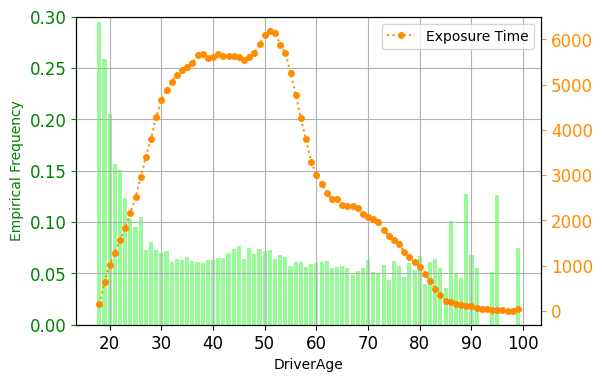

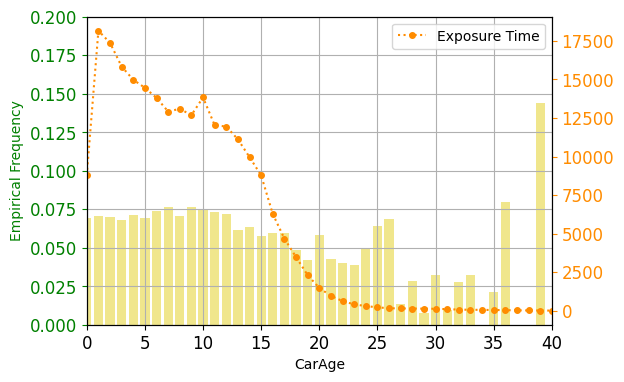

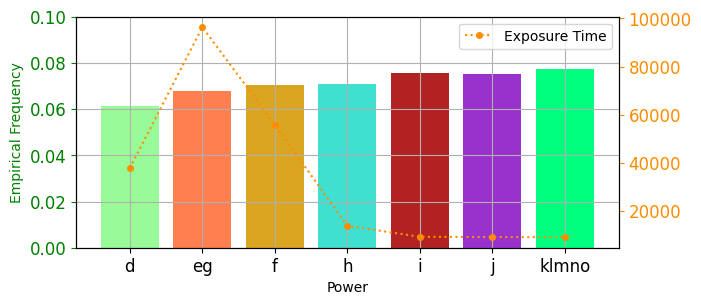

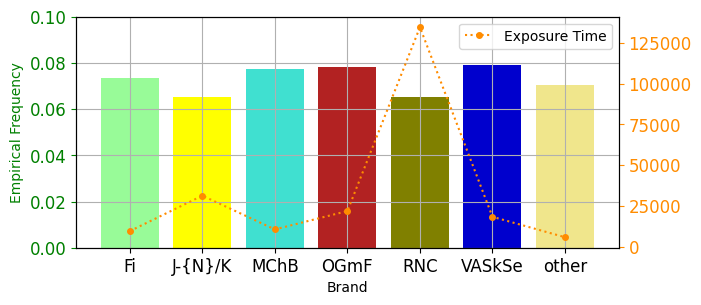

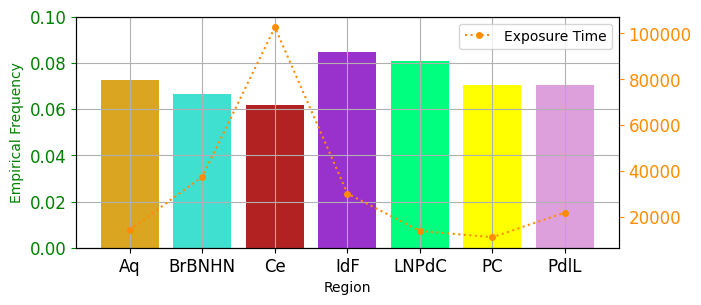

In [59]:
#density

freqs['DensityS'].value_counts().sort_index()[-10:]

quants=np.append(np.arange(0.1,1,0.1), np.arange(0.95,0.99,0.01))
freqs['DensityS'].quantile(q=quants)

#categorical Frequency dependency plots 
def MarginalDPlot(dataset, feature, colors, response = "Empirical Frequency", 
                  xlims = None, ylims = None, size = (6,4), measure = "Exposure"):
  fig, ax = plt.subplots(figsize=size, dpi=100) 
# Plot the CO2 variable in blue
  ax.bar(dataset.index, dataset[response], label = response, color = colors) 
  ax.grid(True)
  # ax.set_title("Average Claim Amounts and nº of reported Claims for each Driver Age", size = 1 
  ax.set_xlabel(feature, fontsize=10)
  ax.set_ylabel(response, fontsize=10) 
  ax.set_ylim(ylims)
  ax.set_xlim(xlims)
  ax.yaxis.label.set_color('g')
  ax.tick_params(axis='y', colors='g')
  # Create a twin Axes that shares the x-axis
  ax2 = ax.twinx()
  # Plot the relative temperature in red 
  if measure == "Exposure":
    ylabel = "Exposure Time" 
    ycolor = "darkorange"
  else:
    ylabel = "n-square Counts" 
    ycolor = "steelblue"
  ax2.plot(dataset.index, dataset[measure], label = ylabel, color = ycolor, linestyle = ":", marker = "o", markersize=4)
  ax2.legend(loc = 'best', bbox_to_anchor = (0.5, 0.5, 0.5, 0.5)) 
  ax2.tick_params(axis='y', colors=ycolor)
MarginalDPlot(dataset = DriverAgeData, colors = ["palegreen"], feature = "DriverAge", ylims = [0, 0.3])
MarginalDPlot(dataset = CarAgeData, colors = ["khaki"], feature = "CarAge", xlims = [0, 40], ylims= [0, 0.2])
clspower = ["palegreen", "coral", "goldenrod", "turquoise", "firebrick", "darkorchid", "springgreen", "yellow", "plum", "olive", "mediumblue", "khaki"]
MarginalDPlot(dataset = PowerSmplData, colors = clspower, feature = "Power", ylims = [0, 0.1], size = (7, 3))
clsbrand = ["palegreen", "yellow", "turquoise", "firebrick", "olive", "mediumblue", "khaki"] 
MarginalDPlot(dataset = BrandData, colors = clsbrand, feature = "Brand", ylims = [0, 0.1], size = 
(7, 3))
clsregion = ["goldenrod", "turquoise", "firebrick", "darkorchid", "springgreen", "yellow", "plum", 
"olive", "mediumblue", "khaki"]
MarginalDPlot(dataset = RegionSmplData, colors = clsregion, feature = "Region", ylims = [0, 0.1], 
size = (7, 3))

In [60]:
#first glm fitting trial

#frequencies

import statsmodels 
import statsmodels.api as sm 
from statsmodels.formula.api import glm
from sklearn.model_selection import train_test_split as tts 

#seeds=[2802,2303,1410,2105,2403]
seed=2802 
freqs_train, freqs_test=tts(freqs, test_size=0.2, random_state=seed) 

pd.options.display.float_format='{}:.4f'.format 
print(f'The test set for frequancies has {freqs_test.shape[0]} instances')
freqs_train['ClaimNb'].value_counts(normalize=True)

print(f'The test set for frequencies has {freqs_test.shape[0]} instances')
freqs_test['ClaimNb'].value_counts(normalize=True)



model2=glm('ClaimNb~CarAge+DriverAge', data=freqs_train, family=sm.families.Poisson(), exposure=np.asarray(freqs_train['Exposure'])).fit()


#print model summary 

print(model2.summary())

#Define model formula 
formula2='ClaimNb~CarAge+DriverAge+C(Gas)'

#Fit GLM

model3=glm(formula2, data=freqs_train, family=sm.families.Poisson(), exposure=np.asarray(freqs_train['Exposure'])).fit()

#print model summary
print(model3.summary())

#define model formula
formula3='ClaimNb~CarAge+DriverAge+C(Gas)+C(Brand, Treatment(1))'

model4=glm(formula3, data=freqs_train, family=sm.families.Poisson(), exposure=np.asarray(freqs_train['Exposure'])).fit()

#print model summary
print(model4.summary())

from patsy import dmatrix 
freqs_train_matrix=dmatrix('CarAge+DriverAge+C(Gas)+C(Brand, Treatment(1))+C(RegionSmpl, Treatment(2))+C(PowerSmpl)+DensityS', \
                           data=freqs_train, return_type='dataframe')

from statsmodels.genmod.generalized_linear_model import GLM 

#Fit Glm
model7=GLM(endog=freqs_train['ClaimNb'], exog=freqs_train_matrix, family=sm.families.Poisson(), exposure=freqs_train['Exposure']).fit()

#print model summary
print(model7.summary())




The test set for frequancies has 82606 instances
The test set for frequencies has 82606 instances
                 Generalized Linear Model Regression Results                  
Dep. Variable:                ClaimNb   No. Observations:               330422
Model:                            GLM   Df Residuals:                   330419
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -53556.
Date:                Fri, 14 Apr 2023   Deviance:                       82648.
Time:                        06:20:03   Pearson chi2:                 5.82e+05
No. Iterations:                     7   Pseudo R-squ. (CS):           0.001068
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [61]:
#Testing and predictiong Frequencies with the glm

# the fllowing lists will compile the performance results and descriptions from all chosen models

modeltype=[]
modeldesc=[]
GEtype=[]
modeltrainGE=[]
modeltestGE=[]

freqs_test_matrix=dmatrix('CarAge + DriverAge + C(Gas) + C(Brand, Treatment(1)) + C(RegionSmpl, \
Treatment(2)) + C(PowerSmpl) + DensityS', data = freqs_test, return_type = 'dataframe')
freqs_test_matrix.shape


## Custom made function to calculate Poisson Deviance from actual response 'y' and predictions.

def DevianceP(y_i, mu_i):
  D=np.empty(shape=y_i.shape[0])
  for i in range(y_i.shape[0]):
    if y_i[i]==0:
      D[i]=mu_i[i]-y_i[i]
    else:
      D[i]=y_i[i]*np.log(y_i[i]/mu_i[i])-(y_i[i]-mu_i[i])

  return(2*sum(D))


freqs_fitted=model7.predict()
Dpois=DevianceP(freqs_train['ClaimNb'].values, freqs_fitted.values)
GEpoisGLMtrain=Dpois/freqs_train['ClaimNb'].shape[0]

modeltype.append('Frequency')
modeldesc.append('Optimal Frequency GLM')
GEtype.append('Poisson')
modeltrainGE.append(round(GEpoisGLMtrain, 5))

print('Based on Train data: Deviance is', round(Dpois, 2), 'and Generalization Error is', round(GEpoisGLMtrain, 5))

freqs_pred=model7.predict(exog=freqs_test_matrix, exposure=freqs_test['Exposure'])
Dpois=DevianceP(freqs_test['ClaimNb'].values, freqs_pred.values)
GEpoisGLMtest=Dpois/freqs_test['ClaimNb'].shape[0]

modeltestGE.append(round(GEpoisGLMtest, 5))

print('Based on Test data: Deviance is', round(Dpois, 2), 'and Generalization Error is', round(GEpoisGLMtest,5))


Based on Train data: Deviance is 82293.47 and Generalization Error is 0.24906
Based on Test data: Deviance is 20833.46 and Generalization Error is 0.2522


The proportion of claim amounts above 10000 is 0.017 with a total of 275 claims
The proportion of claim amounts above 10000 is 0.017 with a total of 275 claims
Frequency is equal or higher that 1 in 99.91% of instances
Frequency is equal or higher that 1 in 3.83% of instances


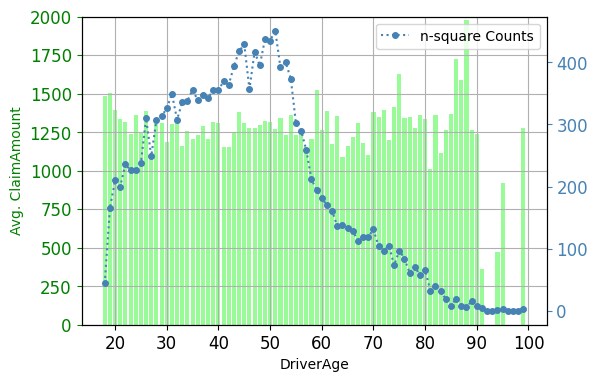

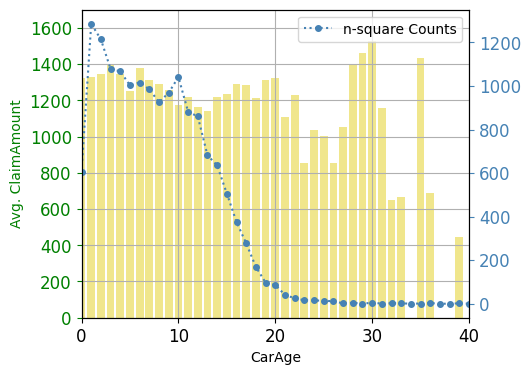

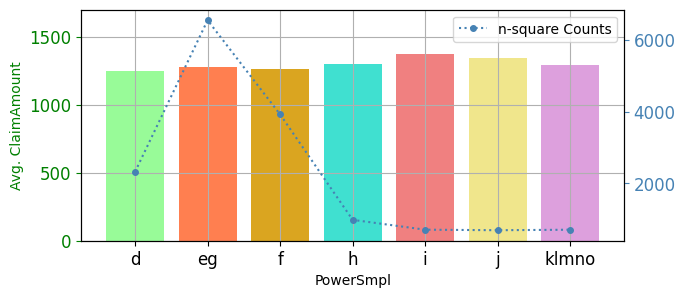

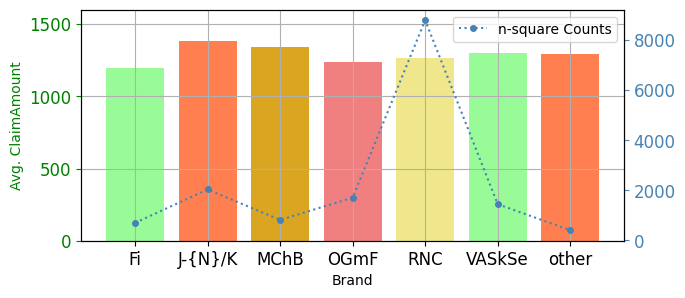

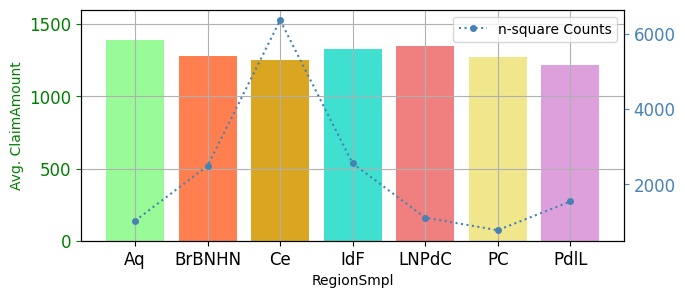

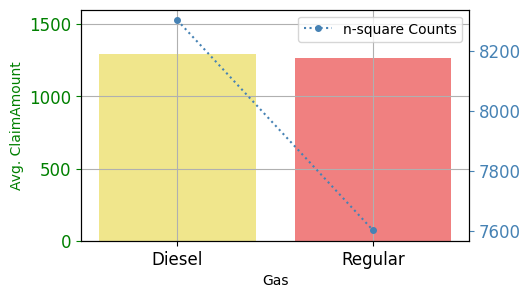

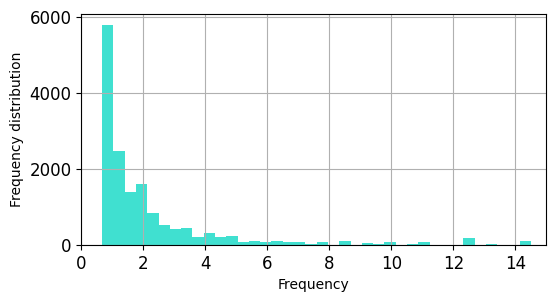

In [62]:
#severities 

#analysis of the reported claims 

# Here we can obtain information about the distribution of Claim Amounts, and we do so by cheking 
# what proportion out of the whole claims record are above a specific threshold

claims1=claims.copy()
threshold=10_000

total=freMTPLsev.loc[freMTPLsev['ClaimAmount']>threshold, 'ClaimAmount'].shape[0]
proportion=total/freMTPLsev.shape[0]
print('The proportion of claim amounts above', threshold, 'is', round(proportion, 5),
      'with a total of', total, 'claims')

def Proportion(df, feat, threshold):
  total=df.loc[df[feat]>threshold, feat].shape[0]
  proportion=total/df.shape[0]
  return proportion, total

thresholds = [4000, 10_000, 20_000, 70_000, 50_000, 100_000, 150_000, 200_000, 500_000, 1_000_000] 
Props = np.empty(shape = len(thresholds))
Totals = np.empty(shape = len(thresholds))
i=0

for thres in thresholds:
  Props[i], Totals[i]=Proportion(df=freMTPLsev, feat='ClaimAmount', threshold=thres)
  i+=1

DistrInfo=pd.DataFrame({'Amount Threshold':thresholds, 'Proportion Exceeding':Props, 'Total Exceeding':Totals.astype(int)})

DistrInfo 

threshold=10_000 
Prop, Total=Proportion(df=freMTPLsev, feat='ClaimAmount', threshold=threshold) 
print('The proportion of claim amounts above', threshold, 'is', round(Prop, 5), 'with a total of',
      Total, 'claims')


MarginalDPlot(dataset = DriverAgeData, colors = ["palegreen"], feature = "DriverAge",
ylims = [0, 2000], response = "Avg. ClaimAmount", measure = "ClaimNb")
MarginalDPlot(dataset = CarAgeData, colors = ["khaki"], feature = "CarAge",
xlims = [0, 40], ylims = [0, 1_700], response = "Avg. ClaimAmount", measure = "Claim\
Nb", size = (5, 4))
clspower = ["palegreen", "coral", "goldenrod", "turquoise", "lightcoral", "khaki", "plum"] 
MarginalDPlot(dataset = PowerSmplData, colors = clspower, feature = "PowerSmpl", ylims = [0, 1_700 
], size = (7, 3),
response = "Avg. ClaimAmount", measure = "ClaimNb")
clsbrand = ["palegreen", "coral", "goldenrod", "lightcoral", "khaki"]
MarginalDPlot(dataset = BrandData, colors = clsbrand, feature = "Brand", ylims = [0, 1_600], size 
= (7, 3),
response = "Avg. ClaimAmount", measure = "ClaimNb")
clsbrand = ["palegreen", "coral", "goldenrod", "turquoise", "lightcoral", "khaki", "plum"] 
MarginalDPlot(dataset = RegionSmplData, colors = clsbrand, feature = "RegionSmpl", ylims = [0, 1_600], size = (7, 3), 
response = "Avg. ClaimAmount", measure = "ClaimNb")
clsgas = ["khaki", "lightcoral"]
MarginalDPlot(dataset = GasData, colors = clsgas, feature = "Gas", ylims = [0, 1_600], size = (5, 
3),
response = "Avg. ClaimAmount", measure = "ClaimNb")
fig, ax = plt.subplots(figsize=(6, 3), dpi=100) 
# Plot the CO2 variable in blue
ax.hist(claims1['Frequency'], label = "Frequency distribution", bins = 1000, color = ["turquoise"] 
)
ax.grid(True)
# ax.set_title("Average Claim Amounts and nº of reported Claims for each Driver Age", size = 10) 
ax.set_xlabel("Frequency", fontsize=10)
ax.set_ylabel("Frequency distribution", fontsize=10) 
ax.set_xlim([0, 15])
# What are the highest claims? Could they affect the modelling process?
print('Frequency is equal or higher that 1 in {:.2%} of instances'.format(claims1[claims1['Frequency']>=1].shape[0] / claims1['Frequency'].shape[0]))
print('Frequency is equal or higher that 1 in {:.2%} of instances'.format(freqs_test[freqs_test['Frequency']>=1].shape[0] / freqs_test['Frequency'].shape[0]))

In [63]:
freqs_test[freqs_test['Frequency']>=1]

,ClaimNb,Exposure,Power,CarAge,DriverAge,Brand,Gas,Region,Density,DensityS,...,PowerT,BrandT,GasT,RegionT,PowerSmplT,RegionSmplT,BrandSmplT,PowerSmplT2,RegionSmplT2,BrandSmplT2
PolicyID,,,,,,,,,,,,,,,,,,,,,
291899,1,1.0:.4f,j,11,43,RNC,Diesel,PdlL,4128,4.128:.4f,...,5,5,0,4,2,3,4,1,6,2
88325,1,1.0:.4f,d,9,21,RNC,Regular,PdlL,1408,1.408:.4f,...,11,5,1,4,6,3,4,6,6,2
131593,1,0.96:.4f,e,3,32,J-{N}/K,Regular,IdF,424,0.424:.4f,...,8,6,1,0,5,0,4,4,2,2
144348,1,1.0:.4f,g,13,33,OGmF,Regular,PdlL,295,0.295:.4f,...,10,1,1,4,5,3,1,4,6,3
100419,2,0.53:.4f,g,6,21,RNC,Diesel,PdlL,127,0.127:.4f,...,10,5,0,4,5,3,4,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263702,1,0.91:.4f,g,5,44,RNC,Diesel,Ce,44,0.044:.4f,...,10,5,0,9,5,6,4,4,5,2
5706,1,1.0:.4f,f,10,56,VASkSe,Diesel,Br,747,0.747:.4f,...,9,0,0,8,4,5,0,5,3,0
172722,1,0.32:.4f,g,10,21,RNC,Diesel,Ce,30,0.03:.4f,...,10,5,0,9,5,6,4,4,5,2


The mean equals 1280
The variance equals 1428027.684 and the standard deviation equals 1195.001
                 Generalized Linear Model Regression Results                  
Dep. Variable:            ClaimAmount   No. Observations:                12653
Model:                            GLM   Df Residuals:                    12649
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                         0.84367
Method:                          IRLS   Log-Likelihood:            -1.0282e+05
Date:                Fri, 14 Apr 2023   Deviance:                       9619.6
Time:                        06:20:22   Pearson chi2:                 1.07e+04
No. Iterations:                    18   Pseudo R-squ. (CS):           0.007093
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

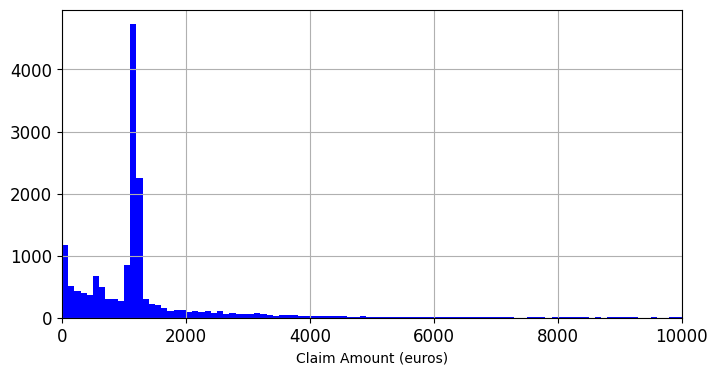

In [64]:
# %matplotlib widget 
%matplotlib inline 
# import matplotlib.pyplot as plt 

#Initalize a Figure and Axes 


fig, ax = plt.subplots(figsize=(8, 4), dpi=100) 
# Empirical Frequency
# Plot the CO2 variable in blue
ax.hist(claims['ClaimAmount'], bins = 100, color = "b") 
ax.set_xlim([0, 10000])
ax.grid(True)
# ax.set_title("Average Claim Amounts and nº of reported Claims for each Driver Age", size = 10) 
ax.set_xlabel("Claim Amount (euros)", fontsize=10)


## Based on the train-test split peformed on freqs table, we must split the claims table accordingl 
# y to the claim Amounts contained in both resulting parts from freqs.

claims_train=pd.merge(left=claims1['ClaimAmount'], right=freqs_train, how='inner', left_index=True, right_index=True)
claims_train=claims_train.drop(['ClaimNb','Exposure'], axis=1)

claims_test=pd.merge(left=claims1['ClaimAmount'], right=freqs_test, how='inner', left_index=True, right_index=True)
claims_test=claims_test.drop(['ClaimNb', 'Exposure'], axis=1)
claims_train.describe()

claims_test.describe()

claims_train.shape[0]/claims1.shape[0]+claims_test.shape[0]/claims1.shape[0]

from statistics import mean 
from statistics import variance as var 

media=mean(claims1['ClaimAmount'].values)
varianza=var(claims1['ClaimAmount'])
print('The mean equals', media)
print('The variance equals', round(varianza, 3), 'and the standard deviation equals', round(varianza**(1/2),3))

#glm training for claims 

claims_train_matrix1=dmatrix('CarAge+DriverAge+Frequency', data=claims_train, return_type='dataframe')
models1=GLM(endog=claims_train['ClaimAmount'], exog=claims_train_matrix1, family=sm.families.Gamma(link=sm.families.links.log())).fit()



print(models1.summary())

#can we add any more significant variables to the model?

freqs_train.loc[freqs_train['ClaimNb']>0, 'ClaimNb'].value_counts()

sevF='CarAge+C(DriverAgeB, Treatment(1))+Frequency'
claims_train_matrix2=dmatrix(sevF, data=claims_train, return_type='dataframe') 
models2=GLM(endog=claims_train['ClaimAmount'], exog=claims_train_matrix2, family=sm.families.Gamma(link=sm.families.links.log())).fit()

print(models2.summary())

#sevF='CarAge+C(DriverAgeB, Treatment(1))+PowerSmplT2+RegionSmplT2+DensityS+Frequency 

sevF1='CarAge+C(DriverAgeB, Treatment(1))+PowerSmplT+RegionSmplT+DensityS'
claims_train_matrix3=dmatrix(sevF1,data=claims_train, return_type='dataframe')
models3=GLM(endog=claims_train['ClaimAmount'], exog=claims_train_matrix3, family=sm.families.Gamma(link=sm.families.links.log())).fit()
print(models3.summary())










In [65]:
#predicting and testing Claims with the glm 


claims_test_matrix=dmatrix(sevF, data=claims_test, return_type='dataframe')
claims_test_matrix1=dmatrix(sevF1, data=claims_test, return_type='dataframe')
claims_test_matrix.shape 

def DevianceG(y_i, mu_i):
  D=np.empty(shape=y_i.shape[0])
  for i in range(y_i.shape[0]):
    D[i]=-np.log(y_i[i]/mu_i[i])+(y_i[i]-mu_i[i])/mu_i[i]
  return(2*sum(D))

  #train set predictions 

claims_fitted=model2.predict()
Dgamma=DevianceG(claims_train['ClaimAmount'].values, claims_fitted)
GEgammaGLMtrain=Dgamma/claims_train['ClaimAmount'].shape[0]

modeltype.append('Severity')
modeldesc.append('optimal severity GLM')
GEtype.append('Gamma')
modeltrainGE.append(round(GEgammaGLMtrain, 5))

print('Based on train data: Deviance is', round(Dgamma,2), 'and Generalization Error is',
      round(GEgammaGLMtrain, 5))

claims_fitted1=models3.predict()
Dgamma1=DevianceG(claims_train['ClaimAmount'].values, claims_fitted1)
GEgammaGLMtrain1=Dgamma1/claims_train['ClaimAmount'].shape[0]


modeltype.append('Severity')
modeldesc.append('Optimal Alt. severity GLM')
GEtype.append('Gamma')
modeltrainGE.append(round(GEgammaGLMtrain1, 5))

print('Based on Train data: Deviance is', round(Dgamma1,2), 'and Generalization Error is', 
      round(GEgammaGLMtrain1, 5))

print(f'Average claim amount is {claims_train.ClaimAmount.mean():.6}euro')

print(f'Average fitted claim amounts for optimal GLM is {claims_fitted.mean():.6}euro')
print(f'Average fitted claim amounts for alternative optimal GLM is {claims_fitted1.mean():.6}euro')


#test set predictions 

claims_pred=models2.predict(exog=claims_test_matrix) 
Dgamma=DevianceG(claims_test['ClaimAmount'].values, claims_pred.values)
GEgammaGLMtest=Dgamma/claims_test['ClaimAmount'].shape[0]

modeltestGE.append(round(GEgammaGLMtest, 5))

print('Based on Test data: Deviance is', round(Dgamma,2), 'and Generalization Error is', round(GEgammaGLMtest, 5))

claims_pred1=models3.predict(exog=claims_test_matrix1)
Dgamma1=DevianceG(claims_test['ClaimAmount'].values, claims_pred1.values)
GEgammaGLMtest1=Dgamma1/claims_test['ClaimAmount'].shape[0]

modeltestGE.append(round(GEgammaGLMtest1, 5))

print('Based on Test data: Deviance is', round(Dgamma1, 2), 'and Generalization Error is',
      round(GEgammaGLMtest1, 5))

print(f'Average claim amount is {claims_test.ClaimAmount.mean():.6}euro')
print(f'Average test predicted claim amounts for optimal GLM is {claims_pred.mean():.6}euro')
print(f'Average test predicted claim amounts for alternative optimal GLM is {claims_pred1.mean():.6}euro')





Based on train data: Deviance is 3767240675.06 and Generalization Error is 297734.97788
Based on Train data: Deviance is 9625.37 and Generalization Error is 0.76072
Average claim amount is 1281.16euro
Average fitted claim amounts for optimal GLM is 0.0382935euro
Average fitted claim amounts for alternative optimal GLM is 1281.13euro
Based on Test data: Deviance is 2549.49 and Generalization Error is 0.78518
Based on Test data: Deviance is 2566.38 and Generalization Error is 0.79038
Average claim amount is 1278.41euro
Average test predicted claim amounts for optimal GLM is 1278.78euro
Average test predicted claim amounts for alternative optimal GLM is 1281.71euro


In [126]:
#loss costing with glms


freqs_test1=freqs_test.copy()

def PricingGLM(test, freqGLM, sevGLM, freqFormula, sevFormula):

  # The test data has to be rearranged into the two different GLM models matrices following their feature specification
  freq_matrix=dmatrix(freqFormula, data=test, return_type='dataframe')
  sev_matrix=dmatrix(sevFormula, data=test, return_type='dataframe')

  # The GLMs must make their predictions for both frequencies and severities

  freq_pred=freqGLM.predict(exog=freq_matrix, exposure=test['Exposure'])
  sev_pred=sevGLM.predict(exog=sev_matrix)

  #once we have the predictions, we can easily compute the pure premium
  pure_premium=freq_pred*sev_pred 
  return freq_pred, sev_pred, pure_premium 


freqF='CarAge+DriverAge+C(Gas)+C(Brand, Treatment(1))+ C(RegionSmpl, Treatment(2))+C(PowerSmpl)+DensityS'
# We aggregate the loss incurred by each policy, so that we can join this information with the freqs table

AggregatedLoss=claims.groupby(level=0).sum()['ClaimAmount']
# We initiate the PremiumAnalysis table, were the summary information will be compiled
PremAnalysisGLM=freqs_test1[['ClaimNb', 'Exposure']].copy()
# We perform the joint with PremiumAnalysis as the target
PremAnalysisGLM=pd.merge(PremAnalysisGLM, AggregatedLoss, how='left', left_index=True,
                        right_index=True)
PremAnalysisGLM.fillna(0, inplace=True)
PremAnalysisGLM=PremAnalysisGLM.rename(columns={'ClaimAmount':'Aggregated Loss'})
PremAnalysisGLM['Pred. Frequency'], PremAnalysisGLM['Pred. Severity'], PremAnalysisGLM['Pure Premium']=\
PricingGLM(freqs_test1, freqGLM=model7, sevGLM=models3, freqFormula=freqF, sevFormula=sevF1)


#premium analysis table 

PremAnalysisGLM['Anual Pure Prem.']=PremAnalysisGLM['Pure Premium']/PremAnalysisGLM['Exposure']
PremAnalysisGLM.iloc[15:23]

PremAnalysisGLM.describe()

#single profile prediction 

original_feat=list(freqs0.columns)
del(original_feat[0:1])
del(original_feat[-3:])
print(original_feat)


seed=2303 

freqs_test1.iloc[[seed]][original_feat]

PremAnalysisGLM.iloc[[seed]][['Pred. Frequency', 'Pred. Severity', 'Pure Premium', 'Anual Pure Prem.']]






['Exposure', 'Power', 'CarAge', 'DriverAge', 'Brand', 'Gas', 'Region', 'Density']


,Pred. Frequency,Pred. Severity,Pure Premium,Anual Pure Prem.
PolicyID,,,,
274731,0.02,"1,346.08",27.69,110.75


In [127]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.1.1
# !pip install pdpbox>=0.2.1


Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you h

In [128]:
# !pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.


In [129]:

#GBM fitting 


#GBRT for Frequencies 

## There are some basic imports that are worth having at our disposal

from datetime import datetime 
from sklearn import metrics 
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import lightgbm as lgb

from pdpbox import pdp, get_dataset, info_plots 

# Only the original set of features will be tested in the first LightGBM example, this configuration can be rearranged afterwards
initial_conf = ['ClaimNb', 'Exposure', 'PowerT', 'CarAge', 'DriverAge', 'BrandT', 'GasT', 'RegionT', 'DensityS']
advanced_conf = ['ClaimNb', 'Exposure', 'PowerSmplT', 'CarAge', 'DriverAge', 'BrandT', 'GasT', 'RegionSmplT', 'DensityS']
# We will apply this feature configuration to the train set, and if we decide to finally test the
# model, then we will have to do the same in the test set

freqs_train2=freqs_train.copy()
freqs_train2=freqs_train2[initial_conf]

## The implementation of GBM models requires arranging the data in the following structure:

freqs_train2_y=freqs_train2['ClaimNb'].values/freqs_train2['Exposure'].values
freqs_train2_w=freqs_train2['Exposure'].values 
freqs_train2_X=freqs_train2.drop(['ClaimNb', 'Exposure'], axis=1)
#LightGBM requieres to convert our categoricals into integers that is why we select the versions 
# of categoricals ending in T

freqs_train2_y.shape 


# We will use the sklearn API for lightGBM for better compatibility with related tools
seed=1008
start=datetime.now()

GBMmodel=lgb.LGBMRegressor(max_depth=4, learning_rate=0.05, n_estimators=200,
                           objective='poisson', min_child_samples=1000,importance_type='gain', random_state=seed)
GBMmodel.fit(freqs_train2_X, freqs_train2_y, sample_weight=freqs_train2_w)
stop=datetime.now()
execution_time_lgbm=stop-start 

# Sample weights are correctly taken into account

print('LightGBM execution time is :', execution_time_lgbm)

GBMmodel.feature_importances_


#predicting with LightGBM for frequencies

freqs_test2=freqs_test.copy()
freqs_test2=freqs_test2[initial_conf]
freqs_test2_y=freqs_test2['ClaimNb'].values
freqs_test2_w=freqs_test2['Exposure'].values 
freqs_test2_X=freqs_test2.drop(['ClaimNb', 'Exposure'], axis=1)

#freqs_test2_X=freqs_test2_X.replace(cat_to_int)
#, weight=freqs_train2_w

fitted_y=GBMmodel.predict(freqs_train2_X)
pred_y=GBMmodel.predict(freqs_test2_X)
freqs_test2_X.info()

av_em_frq=sum(freqs_train['ClaimNb'])/sum(freqs_train['Exposure'])
print(av_em_frq)
print(mean(freqs_train['ClaimNb'])) 
# A table for the comparison between predictions both from GLM and for GBM models in the test sets

freqs_test_results=freqs_test2[['ClaimNb', 'Exposure']]
freqs_test_results['GLM prediction']=freqs_pred 
freqs_test_results['GBM prediction']=pred_y*freqs_test2_w 

# The same table but for fitted values from the test set:
freqs_train_results=freqs_train2[['ClaimNb', 'Exposure']]
freqs_train_results['GLM prediction']=freqs_fitted 
freqs_train_results['GBM prediction']=fitted_y*freqs_train2_w 

#Ratios for train set 

av_ev_frq=sum(freqs_train_results['ClaimNb'])/sum(freqs_train_results['Exposure'])

#av_em_frq = mean(freqs_train_results['ClaimNb'] / freqs_train_results['Exposure'])
print('Average empirical frequency', round(av_em_frq,6))
av_GLM_frq=sum(freqs_train_results['GLM prediction'])/sum(freqs_train_results['Exposure'])
print('Average GLM frequency', round(av_GLM_frq, 6))

av_GBM_frq=sum(freqs_train_results['GBM prediction'])/sum(freqs_train_results['Exposure'])
print('Average GBM frequency', round(av_GBM_frq, 6))

print(mean(freqs_test_results['Exposure']))
print(av_GBM_frq/av_GLM_frq)











LightGBM execution time is : 0:00:04.612263
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82606 entries, 43369 to 305739
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PowerT     82606 non-null  category
 1   CarAge     82606 non-null  int64   
 2   DriverAge  82606 non-null  int64   
 3   BrandT     82606 non-null  category
 4   GasT       82606 non-null  category
 5   RegionT    82606 non-null  category
 6   DensityS   82606 non-null  float64 
dtypes: category(4), float64(1), int64(2)
memory usage: 4.9 MB
0.06820205171234862
0.03829345503628693
Average empirical frequency 0.068202
Average GLM frequency 0.068202
Average GBM frequency 0.068202
0.5594483963272039
0.9999965198485089


In [130]:
#ratios for test set 

av_em_frq=sum(freqs_test_results['ClaimNb'])/sum(freqs_test_results['Exposure'])
#av_em_frq = mean(freqs_train_results['ClaimNb'] / freqs_train_results['Exposure'])
print('Average empirical frequency', round(av_em_frq,4))
av_GLM_frq=sum(freqs_test_results['GLM prediction'])/sum(freqs_test_results['Exposure'])
print('Average GLM frequency', round(av_GLM_frq,6))
av_GBM_frq=sum(freqs_test_results['GBM prediction'])/sum(freqs_test_results['Exposure'])
print('Average GBM frequency', round(av_GBM_frq, 6))

#prediction comparison table between glm and gbm model
print(freqs_train_results.sum())

print(freqs_test_results.sum())



Average empirical frequency 0.0703
Average GLM frequency 0.06826
Average GBM frequency 0.068195
ClaimNb           12,653.00
Exposure         185,522.28
GLM prediction    12,653.00
GBM prediction    12,652.96
dtype: float64
ClaimNb           3,247.00
Exposure         46,213.79
GLM prediction    3,154.57
GBM prediction    3,151.56
dtype: float64


In [131]:
#performance results

Dpois = DevianceP(freqs_train_results['ClaimNb'].values, freqs_train_results['GBM prediction'].values)
GEpois = Dpois / freqs_train_results['ClaimNb'].shape[0]
print('Based on Train data: Deviance is', round(Dpois,2), 'and Generalization Error is', round(GEpois,5))

Dpois = DevianceP(freqs_test_results['ClaimNb'].values, freqs_test_results['GBM prediction'].values)
GEpois = Dpois / freqs_test_results['ClaimNb'].shape[0]
print('Based on Test data: Deviance is', round(Dpois,2), 'and Generalization Error is', round(GEpois,5))

Based on Train data: Deviance is 80797.0 and Generalization Error is 0.24453
Based on Test data: Deviance is 20602.22 and Generalization Error is 0.2494


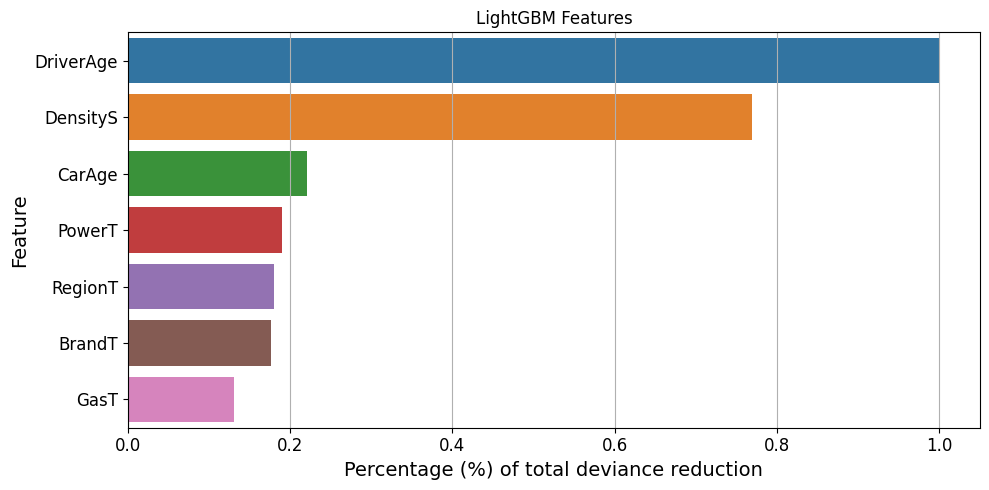

In [132]:
#Feature importance 

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
importances = GBMmodel.feature_importances_ / max(GBMmodel.feature_importances_)
feature_imp = pd.DataFrame(sorted(zip(importances, GBMmodel.feature_name_)),
columns=['Value','Feature'])
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.xlabel('Percentage (%) of total deviance reduction')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'DensityS value-split counts')

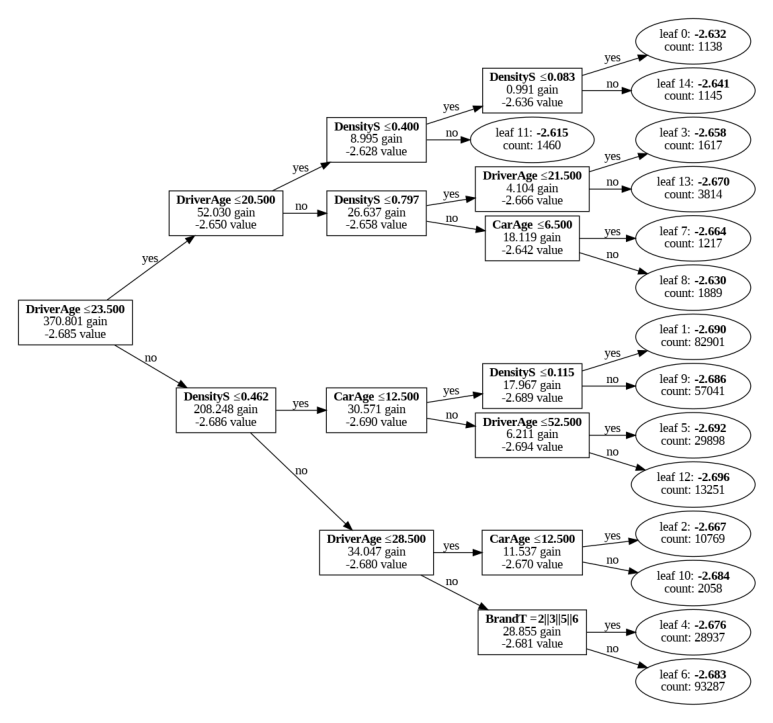

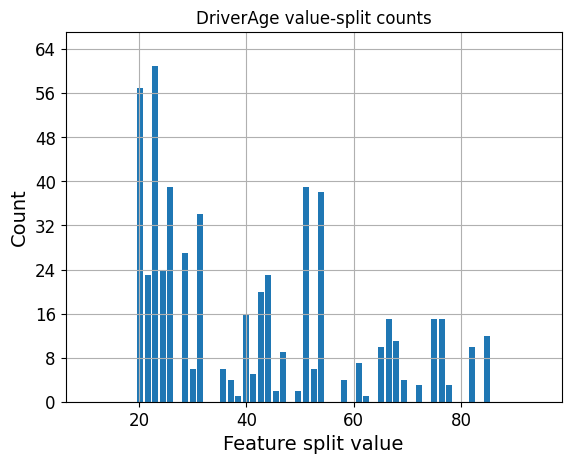

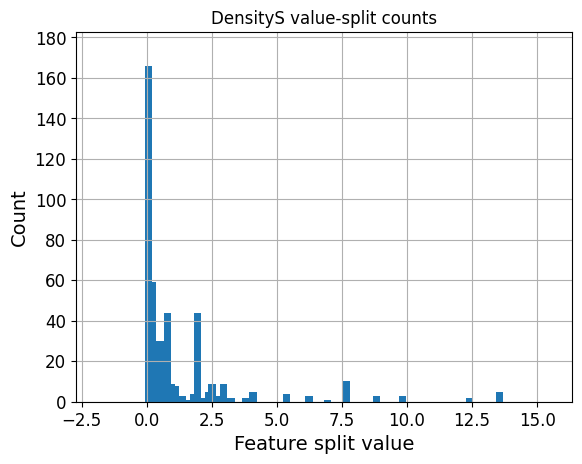

In [133]:
# Basic Tree visualization
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'
lgb.plot_tree(GBMmodel, tree_index = 0, show_info = ["internal_value", "leaf_count", "split_gain"],
              figsize=(10, 6), dpi = 150, orientation = 'horizontal')
np.exp(-2.685)
lgb.plot_split_value_histogram(GBMmodel, feature = "DriverAge", width_coef = 0.8)
plt.title('DriverAge value-split counts')
lgb.plot_split_value_histogram(GBMmodel, feature = "DensityS", width_coef = 2)
plt.title('DensityS value-split counts')

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
total run time was: 0:00:11.812438
Based on Train data: Deviance is 80486.79 and Generalization Error is 0.24359
Based on Test data: Deviance is 20583.73 and Generalization Error is 0.24918


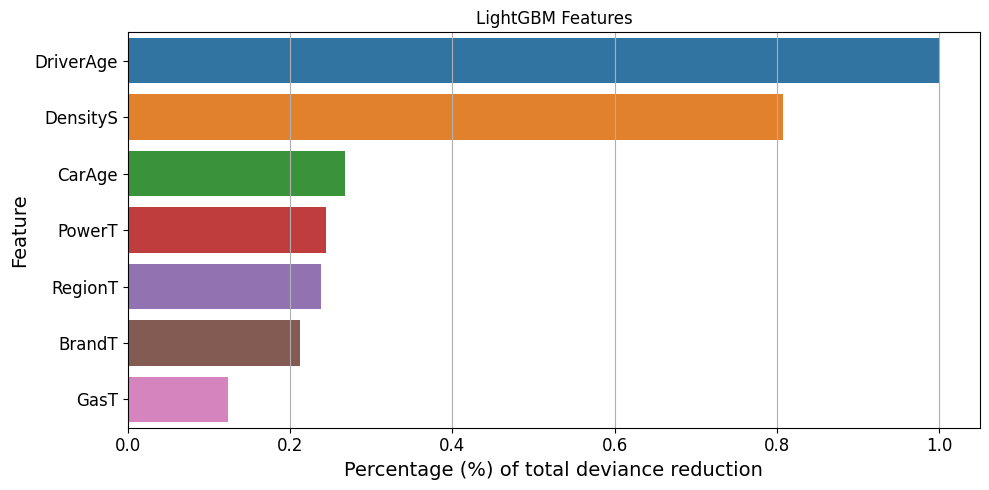

<Axes: title={'center': 'Split value histogram for feature with name CarAge'}, xlabel='Feature split value', ylabel='Count'>

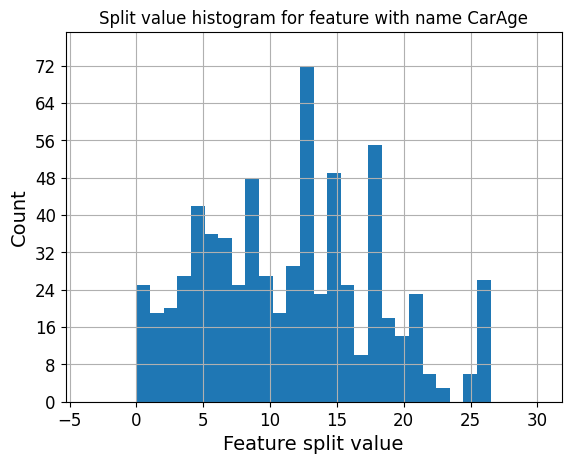

In [134]:
# Quick GBM training and performance evaluation

# freqs_train2_X['Rand'] = [random.random() for i in range(freqs_train2_X.shape[0])]

start=datetime.now()
GBMmodel0=lgb.LGBMRegressor(max_depth=5, learning_rate=0.05, n_estimators=200,
                            objective='poisson', min_child_samples=1000,
                            feature_fraction=0.6, importance_type='gain', random_state=seed)

GBMmodel0.fit(freqs_train2_X, freqs_train2_y, sample_weight=freqs_train2_w)


fitted_y=GBMmodel0.predict(freqs_train2_X)
pred_y=GBMmodel0.predict(freqs_test2_X)

freqs_train_results['GBM prediction']=fitted_y*freqs_train2_w
freqs_test_results['GBM prediction']=pred_y*freqs_test2_w 

Dpoistrain = DevianceP(freqs_train_results['ClaimNb'].values, freqs_train_results['GBM prediction'].values)
GEpoisGBMtrain = Dpoistrain / freqs_train_results['ClaimNb'].shape[0]
Dpoistest = DevianceP(freqs_test_results['ClaimNb'].values, freqs_test_results['GBM prediction'].values)
GEpoisGBMtest = Dpoistest / freqs_test_results['ClaimNb'].shape[0]

end=datetime.now()
runtime = end - start
print("total run time was:", runtime)
print('Based on Train data: Deviance is', round(Dpoistrain,2), 'and Generalization Error is', round(GEpoisGBMtrain,5))
print('Based on Test data: Deviance is', round(Dpoistest,2), 'and Generalization Error is', round(GEpoisGBMtest,5))


modeltype.append('Frequency')
modeldesc.append('Fine-tunned frequency GBM')
GEtype.append('Poisson')
modeltrainGE.append(round(GEpoisGBMtrain, 5))
modeltestGE.append(round(GEpoisGBMtest, 5))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
importances = GBMmodel0.feature_importances_ / max(GBMmodel0.feature_importances_)
feature_imp = pd.DataFrame(sorted(zip(importances, GBMmodel0.feature_name_)), columns=['Value','Feature'])
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.xlabel('Percentage (%) of total deviance reduction')
plt.tight_layout()
plt.show()
lgb.plot_split_value_histogram(GBMmodel0, feature = "CarAge", width_coef = 1)



In [135]:
# Cross Validation through early stopping
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
# %%capture
from sklearn.model_selection import KFold

GBMmodelCV=lgb.LGBMRegressor(max_depth=5, learning_rate=0.05, n_estimators=200,
                             objective='poisson', min_child_samples=1000,
                             feature_fraction=0.4, importance_type='gain', random_state=seed)
kf=KFold(n_splits=5, shuffle=True)
GEpoisCV=[]
predicts=[]
start=datetime.now()

for train_index, test_index in kf.split(freqs_train2_X, freqs_train2_y):
  print('###')
  X_train, X_val=freqs_train2_X.iloc[train_index], freqs_train2_X.iloc[test_index]
  y_train, y_val=freqs_train2_y[train_index], freqs_train2_y[test_index] 
  w_train, w_val=freqs_train2_w[train_index], freqs_train2_w[test_index] 
  GBMmodelCV.fit(X_train, y_train, sample_weight=w_train, eval_set=[(X_val, y_val)],
                 early_stopping_rounds=25) 
  eval_pred=GBMmodelCV.predict(X_val)*w_val 
  y_val=y_val*w_val 
  Dpois = DevianceP(y_val, eval_pred)
  GEpoisCV.append(Dpois / y_val.shape[0])
  predicts.append(GBMmodelCV.predict(freqs_test2_X))

end=datetime.now()
runtime=end-start 

print("total run time was:", runtime.total_seconds())
print("total run time for GBM with 5-CV was:", runtime)
print("average eval GE is:", round(mean(GEpoisCV), 5))




###
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[1]	valid_0's poisson: 0.380789
[2]	valid_0's poisson: 0.380633
[3]	valid_0's poisson: 0.380061
[4]	valid_0's poisson: 0.37991
[5]	valid_0's poisson: 0.379841
[6]	valid_0's poisson: 0.37977
[7]	valid_0's poisson: 0.379318
[8]	valid_0's poisson: 0.379277
[9]	valid_0's poisson: 0.379089
[10]	valid_0's poisson: 0.378953
[11]	valid_0's poisson: 0.378904
[12]	valid_0's poisson: 0.37874
[13]	valid_0's poisson: 0.378237
[14]	valid_0's poisson: 0.378196
[15]	valid_0's poisson: 0.377719
[16]	valid_0's poisson: 0.377623
[17]	valid_0's poisson: 0.377251
[18]	valid_0's poisson: 0.376902
[19]	valid_0's poisson: 0.376761
[20]	valid_0's poisson: 0.376439
[21]	valid_0's poisson: 0.376141
[22]	valid_0's poisson: 0.376034
[23]	valid_0's poisson: 0.375763
[24]	valid_0's poisson: 0.375664
[25]	valid_0's poisson: 0.375296
[26]	valid_0's poisson: 0.375041
[27]	valid_0's poisson: 0.

In [136]:
# Hyper-parameter tunning for GBM frequencies 
# The dictionary helps to compile the different values for the hyperparameters that we will be tes 
# ting
params_dt = {
'learning_rate': [0.05, 0.02, 0.01, 0.005], 
'n_estimators': [200, 500, 700, 1000],
'max_depth': [4, 5, 6] 
}

# Now we will define the function that will do the whole process of K-fold cross-validation for a 
# GBM model with
# a different set of hyperparameters, all of it based on our training information


def HyperpTrialGBM(nfolds, X,y, sample_weights, l_rate=0.01, n_est=1000, max_d=5, frac_ft=0.6):

  seed=2802
  GBMmodel1=lgb.LGBMRegressor(max_depth=max_d, learning_rate=l_rate, n_estimators=n_est, 
                              objective='poisson', min_child_samples=1000,
                              feature_fraction=frac_ft, importance_type='gain', random_state=seed)
  
  kf=KFold(n_splits=nfolds, shuffle=False) 
  GEpoisCV=[]
  start=datetime.now()

  for train_index, test_index in kf.split(X,y):
    X_train, X_val=X.iloc[train_index], X.iloc[test_index] 
    y_train, y_val=y[train_index], y[test_index]
    w_train, w_val=sample_weights[train_index], sample_weights[test_index]

    GBMmodel1.fit(X_train, y_train, sample_weight=w_train, 
                  eval_set=[(X_val, y_val)], early_stopping_rounds=20) 
    eval_pred=GBMmodel1.predict(X_val)*w_val 

    y_val=y_val*w_val 
    Dpois=DevianceP(y_val, eval_pred) 
    GEpoisCV.append(Dpois/y_val.shape[0])

  GEpoisCVav=mean(GEpoisCV)
  end=datetime.now()
  runtime=end-start 

  return GEpoisCVav, runtime 

# # %%capture
# # # Initiate the list for Generalization Error, and then also for run time
# GEs = []
# runtimes = []
# l_rate = []
# n_estimators = []
# max_d = []
# for i in params_dt['learning_rate']:
#     for j in params_dt['n_estimators']:
#         for l in params_dt['max_depth']:
#             GE, time = HyperpTrialGBM(nfolds = 5, X = freqs_train2_X, y = freqs_train2_y,
#                                       sample_weights=freqs_train2_w, l_rate=i, n_est=j,
#                                       max_d = l)
#             GEs.append(GE)
#             runtimes.append(time) 
#             l_rate.append(i)
#             n_estimators.append(j) 
#             max_d.append(l)

# runtimes0 = runtimes.copy()
# runtimes1 = [round(time.total_seconds(),2) for time in runtimes0]
# TunningResults = pd.DataFrame({'Learning Rate':l_rate, 'nº Estimators':n_estimators, 'Max. Depth':max_d,'Validation GE':GEs, 'Run Time (secs.)':runtimes1})

# TunningResults = TunningResults.set_index(['Learning Rate', 'nº Estimators', 'Max. Depth']) 
# TunningResults.head(12)
# print('Total runtime of grid search was {}'.format(round(TunningResults['Run Time (secs.)'].sum( 
# )/60, 2)), 'minutes')
# TunningResults.sort_values(by = "Validation GE").head()
# Optimal = TunningResults['Validation GE'].idxmin(axis = 1)
# Chosen = TunningResults.sort_values(by = "Validation GE").index[1]
# TunningResults['Validation GE'].min()
# print(Chosen)
# print('The best performing GBM model has learning rate', Optimal[0], 
#       ', n-square of trees', Optimal[1], 'and maximum depth', Optimal[2])
# print('The second best GBM model will be that with learning rate', Chosen[0], ', n-square of trees', Chosen[1],
#       'and maximum depth', Chosen[2])








In [137]:
# #Fine-tunning for stochastic GBM 

# params_dt = {
#     'feature_fraction': [0.4, 0.6, 0.8, 1] 
# }
# # %%capture 
# GEs = []

# runtimes = []
# for i in params_dt['feature_fraction']:
#     GE, time = HyperpTrialGBM(nfolds = 5, X = freqs_train2_X, y = freqs_train2_y, 
#                                   sample_weights = freqs_train2_w, l_rate = Chosen[0], 
#                                   n_est = Chosen[1], max_d = Chosen[2], frac_ft = i)
#     GEs.append(GE)
#     runtimes.append(time)
# for i in range(len(params_dt['feature_fraction'])):
#     print("Total run time for optimal GBM with feature_fraction = {} was:".format(params_dt['feature_fraction'][i]), runtimes[i], "while eval GE is:", round(GEs[i], 6))
# print("")
# for i in range(len(params_dt['feature_fraction'])):
#     print("Total run time for second optimal GBM with feature_fraction = {} was:".format(params_dt['feature_fraction'][i]), runtimes[i+4], "while eval GE is:", round(GEs[i+4], 7))
# runtimes1 = [round(time.total_seconds(),2) for time in runtimes]
# sTunningResults = pd.DataFrame({'Feature fraction':params_dt['feature_fraction'], 
#                                'Validation GE':GEs, 'Run Time (secs.)':runtimes1}) 
# sTunningResults = sTunningResults.set_index(['Feature fraction'])
# sTunningResults



In [138]:
# Partial Dependency Plots

from pdpbox import pdp, get_dataset, info_plots 

params= {
# plot title and subtitle
# matplotlib color map for ICE lines 
#     'linestyle': ":",
'line_cmap': 'Blues',
# pdp line color, highlight color and line width 
'pdp_color': '#1A4E5D',
'pdp_hl_color': '#FEDC00', 
'pdp_linewidth': 2,
# horizon zero line color and with 
'zero_color': '#E75438',
'zero_linewidth': 1,
# pdp std fill color and alpha 
'fill_color': '#66C2D7',
'fill_alpha': 0.1,
# marker size for pdp line 
'markersize': 6
}


def PDPlot(model, feature, trainset, xlims = None, ylims = None, n_grid = 25):
  pdp_dist = pdp.pdp_isolate(model=model, dataset=trainset,
                             model_features=trainset.columns, num_grid_points = n_grid,
                             feature=feature)
  fig, axes = pdp.pdp_plot(pdp_dist, feature, center = False, plot_params = params, figsize = (8, 6))
  axes['pdp_ax'].set_ylim(ylims)
  axes['pdp_ax'].set_xlim(xlims)
  axes['pdp_ax'].set_xlabel("", fontsize=15)
  axes['pdp_ax'].set_title(f'PDP for feature {feature}', fontsize=15)
  axes['pdp_ax'].tick_params(axis='both',  labelsize=15)

# PDPdriverage = PDPlot(GBMmodel0, 'DriverAge', freqs_train2_X, ylims = [0.04, 0.30])
# PDPcarage = PDPlot(GBMmodel0, 'CarAge', freqs_train2_X, ylims = [0.03, 0.12], xlims = [0, 25])

# PDPcarage = PDPlot(GBMmodel0, 'DensityS', freqs_train2_X, ylims = [0.04, 0.13], n_grid = 20) 
# start = datetime.now()
# PDPcarage = PDPlot(GBMmodel0, 'DensityS', freqs_train2_X, ylims = [0.04, 0.13], xlims = [0, 5], n_grid = 20)
# end = datetime.now() 
# time = end - start
# print('Total runtime was {}'.format(time))
# pdp_dist1 = pdp.pdp_isolate(model=GBMmodel0, dataset=freqs_train2_X
#                            , model_features=freqs_train2_X.columns, num_grid_points = 7, grid_type = 'equal'
#                            , feature='BrandT')
# fig, axes = pdp.pdp_plot(pdp_dist1, 'BrandT', center = False, plot_params = params, figsize = (8 , 6))
# axes['pdp_ax'].set_ylim([0.04, 0.12])
# axes['pdp_ax'].set_xlabel("", fontsize=15)
# axes['pdp_ax'].set_title('PDP for feature Brand with Target Encoding', fontsize=15) 
# axes['pdp_ax'].set_xticklabels(labels = list(Encodings['RegionT'].keys()))
# axes['pdp_ax'].tick_params(axis='both',  labelsize=15)
# pdp_dist2 = pdp.pdp_isolate(model=GBMmodel0, dataset=freqs_train2_X, model_features=freqs_train2_X.columns, num_grid_points = 12, grid_type = 'equal'
#                            , feature='PowerT') 
# import matplotlib.ticker as ticker
# fig, axes = pdp.pdp_plot(pdp_dist2, 'PowerT', center = False, plot_params = params, figsize = (8,6))
# axes['pdp_ax'].set_ylim([0.03, 0.15])
# axes['pdp_ax'].set_xlabel("", fontsize=15)
# axes['pdp_ax'].set_title('PDP for feature Power with Target Encoding', fontsize=15)
# axes['pdp_ax'].xaxis.set_ticks(np.arange(0, 12, 1))
# axes['pdp_ax'].set_xticklabels(labels = list(Encodings['PowerT'].keys()))
# axes['pdp_ax'].tick_params(axis='both',  labelsize=15)
# pdp_dist3 = pdp.pdp_isolate(model=GBMmodel0, dataset=freqs_train2_X
                          #  , model_features=freqs_train2_X.columns, num_grid_points = 2, grid_type = 'equal'
#                            , feature='GasT')
# fig, axes = pdp.pdp_plot(pdp_dist3, 'GasT', center = False, plot_params = params, figsize = (8, 6))
# axes['pdp_ax'].set_ylim([0.04, 0.12])
# axes['pdp_ax'].set_xlim([-0.3, 1.3])
# axes['pdp_ax'].set_xlabel("", fontsize=15)
# axes['pdp_ax'].set_title('PDP for feature Gas with Target Encoding', fontsize=15)
# # axes['pdp_ax'].xaxis.set_ticks(np.arange(0, 12, 1))
# axes['pdp_ax'].set_xticklabels(labels = list(Encodings['GasT'].keys()))
# axes['pdp_ax'].tick_params(axis='both',  labelsize=15)
# pdp_dist4 = pdp.pdp_isolate(model=GBMmodel0, dataset=freqs_train2_X
#                            , model_features=freqs_train2_X.columns, num_grid_points = 10, grid_type = 'equal'
# #                            , feature='RegionT') 
# import matplotlib.ticker as ticker
# fig, axes = pdp.pdp_plot(pdp_dist4, 'RegionT', center = False, plot_params = params, figsize = (8, 6))
# axes['pdp_ax'].set_ylim([0.03, 0.12])
# axes['pdp_ax'].set_xlabel("", fontsize=15)
# axes['pdp_ax'].set_title('PDP for feature Region with Target Encoding', fontsize=15) 
# axes['pdp_ax'].xaxis.set_ticks(np.arange(0, 10, 1))
# axes['pdp_ax'].set_xticklabels(labels = list(Encodings['RegionT'].keys())) 
# axes['pdp_ax'].tick_params(axis='both',  labelsize=15)

LightGBM execution time is:  0:00:00.376465


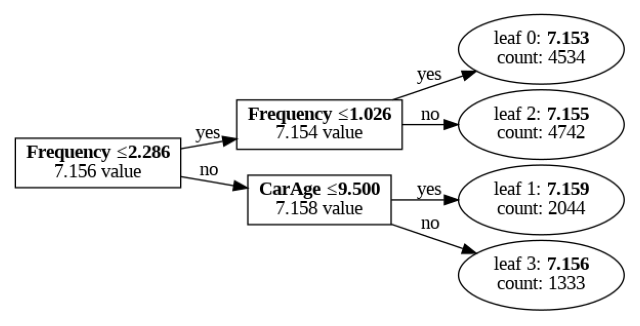

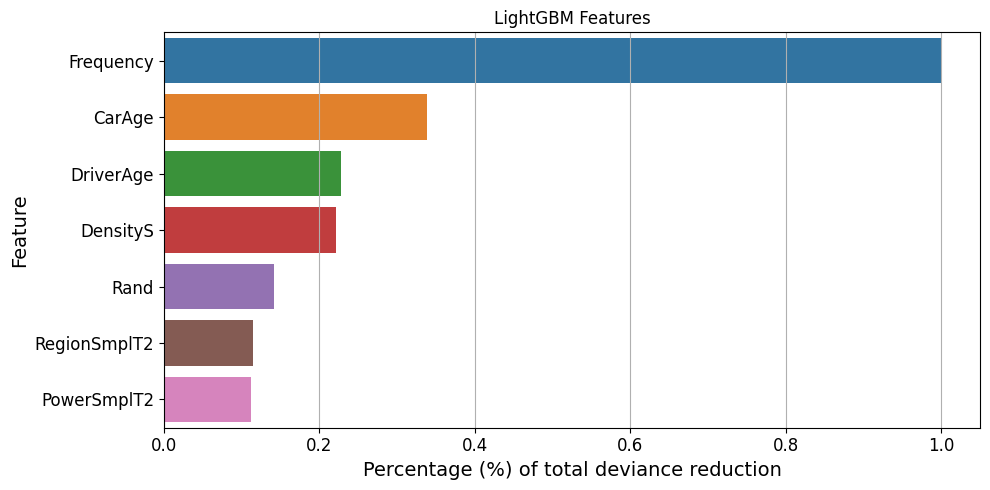

,CarAge,DriverAge,DensityS,Frequency
PolicyID,,,,
33,1,61,27.00,1.33
92,0,36,4.79,7.14
96,0,51,27.00,3.23
96,0,51,27.00,3.23
182,10,24,3.06,1.47
...,...,...,...,...
412262,1,72,0.12,2.38
412270,1,53,4.54,2.78
412664,0,34,6.57,4.55


In [139]:
#GBRT for Claim Amounts 

advanced_conf = ['ClaimAmount', 'CarAge', 'DriverAge', 'PowerSmplT2', 'RegionSmplT2', 'DensityS', 
'Frequency']


claims_train2 = claims_train[advanced_conf] 
claims_test2 = claims_test[advanced_conf] 
import random
claims_train2['Rand'] = [random.random() for i in range(claims_train2.shape[0])] 

claims_train2.describe()

# The implementation of GBM models requires arranging the data in the following structure: 
claims_train2_y = claims_train2['ClaimAmount'].values
claims_train2_X = claims_train2.drop(['ClaimAmount'], axis = 1)
#LightGBM requieres to convert our categoricals into integers that is why we select the versions o 
# f categoricals ending in T


claims_train2_X.shape
# We will use the sklearn API for lightGBM for better compatibility with related tools 
seed = 2303
start=datetime.now()
GBMmodelS0 = lgb.LGBMRegressor(max_depth = 2, learning_rate = 0.02, n_estimators = 500,
                               objective = "gamma", min_child_samples = 100,
                               importance_type = "gain", random_state = seed)

GBMmodelS0.fit(claims_train2_X, claims_train2_y) 
stop=datetime.now()
execution_time_lgbm = stop-start

# Sample weights are correctly taken into account 
print("LightGBM execution time is: ", execution_time_lgbm)
lgb.plot_tree(GBMmodelS0, tree_index = 0, show_info = ["internal_value", "leaf_count"], figsize=(8\
                                    , 4), dpi = 100, orientation = 'horizontal')

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
importances = GBMmodelS0.feature_importances_ / max(GBMmodelS0.feature_importances_)
feature_imp = pd.DataFrame(sorted(zip(importances, GBMmodelS0.feature_name_)), columns=['Value','Feature'])

plt.figure(figsize=(10, 5)) 
plt.grid(True)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.xlabel('Percentage (%) of total deviance reduction')
plt.tight_layout()
plt.show()
last_conf = ['ClaimAmount', 'CarAge', 'DriverAge', 'DensityS', 'Frequency'] 
claims_train2 = claims_train[last_conf]
claims_test2 = claims_test[last_conf]

# The implementation of GBM models requires arranging the data in the following structure: 
claims_train2_y = claims_train2['ClaimAmount'].values
claims_train2_X = claims_train2.drop(['ClaimAmount'], axis = 1)
#LightGBM requieres to convert our categoricals into integers that is why we select the versions of categoricals ending in T

claims_train2_X






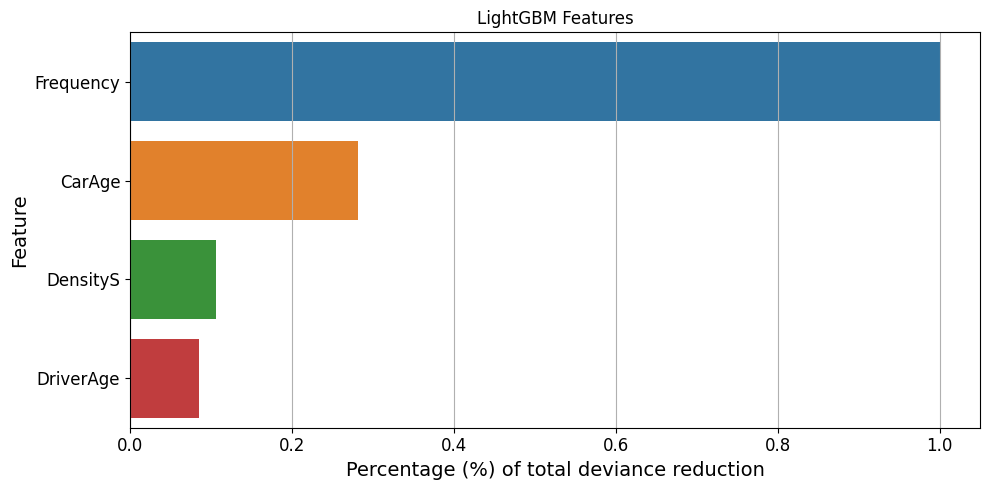

Based on Train data: Deviance is 9498.62 and Generalization Error is 0.7507
Based on Test data: Deviance is 2516.59 and Generalization Error is 0.77505
Based on Train data: Deviance is 9616.35 and Generalization Error is 0.76001
Based on Test data: Deviance is 2555.77 and Generalization Error is 0.78712


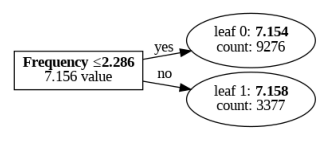

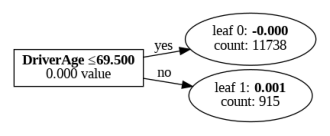

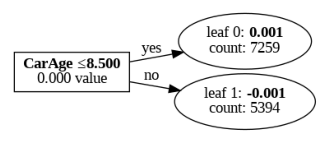

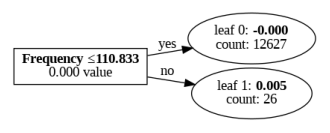

In [140]:
# Quick GBM fitting

start=datetime.now() 
seeed = 1410
GBMmodelS = lgb.LGBMRegressor(max_depth = 1, learning_rate = 0.02, n_estimators = 500,
                              objective = "gamma", feature_fraction = 0.8, 
                              importance_type = "gain", random_state = seed)
GBMmodelS.fit(claims_train2_X, claims_train2_y) 
stop=datetime.now()
execution_time_lgbm = stop-start



# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
importances = GBMmodelS.feature_importances_ / max(GBMmodelS.feature_importances_)
feature_imp = pd.DataFrame(sorted(zip(importances, GBMmodelS.feature_name_)), columns=['Value','Feature'])
plt.figure(figsize=(10, 5)) 
plt.grid(True)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.xlabel('Percentage (%) of total deviance reduction')
plt.tight_layout()
plt.show()



lgb.plot_tree(GBMmodelS, tree_index = 0, show_info = ["internal_value", "leaf_count"], figsize=(4,2), dpi = 100, orientation = 'horizontal')
lgb.plot_tree(GBMmodelS, tree_index = 498, show_info = ["internal_value", "leaf_count"], figsize=( 4, 2), dpi = 100, orientation = 'horizontal')
lgb.plot_tree(GBMmodelS, tree_index = 1, show_info = ["internal_value", "leaf_count"], figsize=(4,2), dpi = 100, orientation = 'horizontal')
lgb.plot_tree(GBMmodelS, tree_index = 499, show_info = ["internal_value", "leaf_count"], figsize=( 4, 2), dpi = 100, orientation = 'horizontal')

# Alternative GBM fitting for claim amounts
last_conf1 = ['ClaimAmount', 'CarAge', 'DriverAge', 'DensityS']
claims_train3 = claims_train[last_conf1]
claims_test3 = claims_test[last_conf1]
claims_train3_y = claims_train3['ClaimAmount'].values
claims_train3_X = claims_train3.drop(['ClaimAmount'], axis = 1)
start=datetime.now() 
seeed = 1410
GBMmodelS1 = lgb.LGBMRegressor(max_depth = 1, learning_rate = 0.02, n_estimators = 500,
objective = "gamma", feature_fraction = 1, 
importance_type = "gain", random_state = seed)
GBMmodelS1.fit(claims_train3_X, claims_train3_y) 
stop=datetime.now()
execution_time_lgbm = stop-start

# Predicting with LightGBM for severities 
claims_test2_y = claims_test2['ClaimAmount'].values
claims_test2_X = claims_test2.drop(['ClaimAmount'], axis = 1) 
fitted_y = GBMmodelS.predict(claims_train2_X)
pred_y = GBMmodelS.predict(claims_test2_X)


# A table for the comparison between predictions both from GLM and for GBM models in the test sets
claims_test_results = claims_test2[['ClaimAmount']]
claims_test_results['GLM prediction'] = claims_pred
claims_test_results['GBM prediction'] = pred_y
# The same table but for fitted values from the test set:
claims_train_results = claims_train2[['ClaimAmount']]
claims_train_results['GLM prediction'] = claims_fitted1
claims_train_results['GBM prediction'] = fitted_y
claims_train_results.sum()

# Performance results 
Dgamma = DevianceG(claims_train_results['ClaimAmount'].values, claims_train_results['GBM prediction'].values)
GEgammaGBMtrain = Dgamma / claims_train_results['ClaimAmount'].shape[0] 
modeltype.append('Severity')
modeldesc.append('Fine-tunned severity GBM') 
GEtype.append('Gamma')
modeltrainGE.append(round(GEgammaGBMtrain, 5))

print('Based on Train data: Deviance is', round(Dgamma,2), 'and Generalization Error is', round(GEgammaGBMtrain, 5))
Dgamma = DevianceG(claims_test_results['ClaimAmount'].values, claims_test_results['GBM prediction'].values)
GEgammaGBMtest = Dgamma / claims_test_results['ClaimAmount'].shape[0] 
modeltestGE.append(round(GEgammaGBMtest, 5))
print('Based on Test data: Deviance is', round(Dgamma,2), 'and Generalization Error is', round(GEgammaGBMtest, 5))



# Performance results for alternative model 
claims_test3_y = claims_test3['ClaimAmount'].values
claims_test3_X = claims_test3.drop(['ClaimAmount'], axis = 1) 
fitted_y = GBMmodelS1.predict(claims_train3_X)
pred_y = GBMmodelS1.predict(claims_test3_X)
Dgamma = DevianceG(claims_train_results['ClaimAmount'].values, fitted_y) 
GEgammaGBMtrain = Dgamma / claims_train_results['ClaimAmount'].shape[0]
modeltype.append('Severity')
modeldesc.append('Fine-tunned alt. severity GBM') 
GEtype.append('Gamma')
modeltrainGE.append(round(GEgammaGBMtrain, 5))
print('Based on Train data: Deviance is', round(Dgamma,2), 'and Generalization Error is', round(GEgammaGBMtrain, 5))
Dgamma = DevianceG(claims_test_results['ClaimAmount'].values, pred_y) 
GEgammaGBMtest = Dgamma / claims_test_results['ClaimAmount'].shape[0]
modeltestGE.append(round(GEgammaGBMtest, 5))
print('Based on Test data: Deviance is', round(Dgamma,2), 'and Generalization Error is', round(GEgammaGBMtest, 5))

# Hyper-parameter tunning for GBM severities 
# The dictionary helps to compile the different values for the hyperparameters that we will be tes 
# ting
params_dt = {
'learning_rate': [0.05, 0.02, 0.01], 
'n_estimators': [200, 500, 700],
'max_depth': [1, 2, 3] 
}






In [141]:
# Now we will define the function that will do the whole process of K-fold cross-validation for a 
# GBM model with
# a different set of hyperparameters, all of it based on our training information

def HyperpTrialGBM(nfolds, X, y, l_rate=0.01, n_est=1000, max_d=5, frac_ft=None):
  seed=2802 
  GBMmodel=lgb.LGBMRegressor(max_depth=max_d, learning_rate=l_rate, n_estimators=n_est,
                             objective='gamma', random_state=seed,
                             feature_fraction=frac_ft, importance_type='gain')
  kf=KFold(n_splits=nfolds, shuffle=False) 
  GEgammaCV=[]
  start=datetime.now()

  for train_index, test_index in kf.split(X,y):
    X_train, X_val=X.iloc[train_index], X.iloc[test_index] 
    y_train, y_val=y[train_index], y[test_index] 

    GBMmodel.fit(X_train, y_train, 
                 eval_set=[(X_val, y_val)], early_stopping_rounds=20)
    eval_pred=GBMmodel.predict(X_val)
    Dpois=DevianceG(y_val, eval_pred)
    GEgammaCV.append(Dpois/y_val.shape[0])

  GEgammaCVav=mean(GEgammaCV)
  end=datetime.now()
  runtime=end-start  

  return GEgammaCVav, runtime 

# %%capture

# Initiate the list for Generalization Error, and then also for run time
GEs=[]
runtimes=[]
l_rate=[]
n_estimators=[]
max_d=[]


for i in params_dt['learning_rate']:
  for j in params_dt['n_estimators']:
    for l in params_dt['max_depth']:
      GE, time=HyperpTrialGBM(nfolds=5, X=claims_train2_X, y=claims_train2_y,
                             l_rate=i, n_est=j, max_d=l)
      GEs.append(GE) 
      runtimes.append(round(time.total_seconds(),2))
      l_rate.append(i)
      n_estimators.append(j)
      max_d.append(l)

TunningResults=pd.DataFrame({'Learning Rate':l_rate, 'n-square estimators':n_estimators, 'Max. Depth':max_d,
                             'Validation GE':GEs, 'Run Time (secs.)':runtimes})
TunningResults=TunningResults.set_index(['Learning Rate', 'n-square estimators', 'Max. Depth'])
TunningResults.head()  


TunningResults['Run Time (secs.)'].sum() 

TunningResults.sort_values(by='Validation GE').head(3)

# minimum = TunningResults['Validation GE'].min()
# maximum = TunningResults['Validation GE'].max()

# Optimal = TunningResults[TunningResults['Validation GE'] == minimum].index.tolist()
# Worst = TunningResults[TunningResults['Validation GE'] == maximum].index.tolist()

Optimal=TunningResults['Validation GE'].idxmin(axis=0)
Worst=TunningResults['Validation GE'].idxmax(axis=0)

print('The best performing GBM model has learning rate', Optimal[0], 
', nº of trees', Optimal[1], 'and maximum depth', Optimal[2])
print('The worst performing GBM model has learning rate', Worst[0], 
', nº of trees', Worst[1], 'and maximum depth', Worst[2])


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[48]	valid_0's gamma: 8.21399
[49]	valid_0's gamma: 8.21396
[50]	valid_0's gamma: 8.21392
[51]	valid_0's gamma: 8.21389
[52]	valid_0's gamma: 8.21385
[53]	valid_0's gamma: 8.21382
[54]	valid_0's gamma: 8.21379
[55]	valid_0's gamma: 8.21376
[56]	valid_0's gamma: 8.21372
[57]	valid_0's gamma: 8.21369
[58]	valid_0's gamma: 8.21366
[59]	valid_0's gamma: 8.21363
[60]	valid_0's gamma: 8.21359
[61]	valid_0's gamma: 8.21356
[62]	valid_0's gamma: 8.21354
[63]	valid_0's gamma: 8.21351
[64]	valid_0's gamma: 8.21348
[65]	valid_0's gamma: 8.21345
[66]	valid_0's gamma: 8.21342
[67]	valid_0's gamma: 8.21339
[68]	valid_0's gamma: 8.21337
[69]	valid_0's gamma: 8.21333
[70]	valid_0's gamma: 8.21331
[71]	valid_0's gamma: 8.21328
[72]	valid_0's gamma: 8.21325
[73]	valid_0's gamma: 8.21322
[74]	valid_0's gamma: 8.2132
[75]	valid_0's gamma: 8.21317
[76]	valid_0's gamma: 8.21314
[77]	valid_0's gamma: 8.21312
[78]	valid_0's gamma: 8.21309
[79]	valid_0's gamma: 8.21306
[80]	

In [142]:
# Optimal=TunningResults['Validation GE'].idxmin(axis=0)
# print(Optimal)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[39]	valid_0's gamma: 8.10054
[40]	valid_0's gamma: 8.10052
[41]	valid_0's gamma: 8.10044
[42]	valid_0's gamma: 8.10031
[43]	valid_0's gamma: 8.10033
[44]	valid_0's gamma: 8.10034
[45]	valid_0's gamma: 8.10026
[46]	valid_0's gamma: 8.10021
[47]	valid_0's gamma: 8.10025
[48]	valid_0's gamma: 8.10023
[49]	valid_0's gamma: 8.10024
[50]	valid_0's gamma: 8.10013
[51]	valid_0's gamma: 8.10015
[52]	valid_0's gamma: 8.10014
[53]	valid_0's gamma: 8.10007
[54]	valid_0's gamma: 8.10002
[55]	valid_0's gamma: 8.10001
[56]	valid_0's gamma: 8.10002
[57]	valid_0's gamma: 8.10003
[58]	valid_0's gamma: 8.09993
[59]	valid_0's gamma: 8.09996
[60]	valid_0's gamma: 8.09995
[61]	valid_0's gamma: 8.09989
[62]	valid_0's gamma: 8.09985
[63]	valid_0's gamma: 8.09988
[64]	valid_0's gamma: 8.09987
[65]	valid_0's gamma: 8.09981
[66]	valid_0's gamma: 8.09972
[67]	valid_0's gamma: 8.09971
[68]	valid_0's gamma: 8.09972
[69]	valid_0's gamma: 8.09973
[70]	valid_0's gamma: 8.09969
[71]

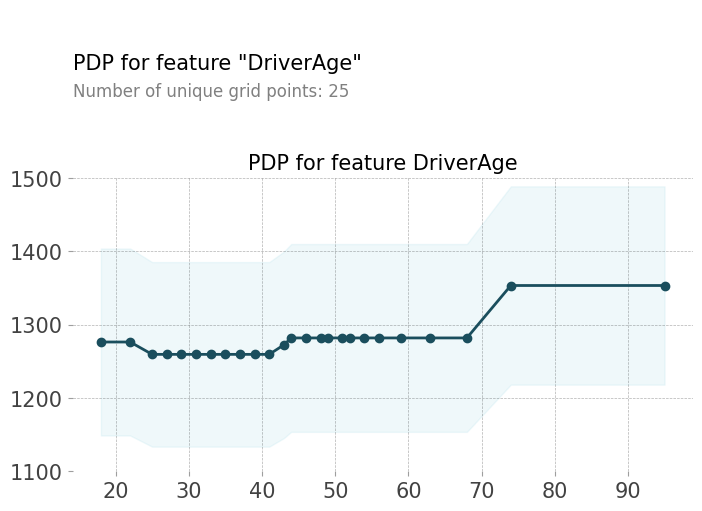

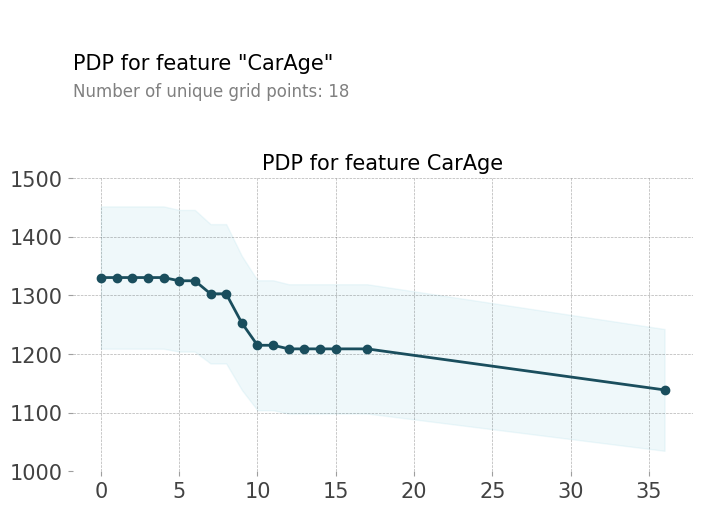

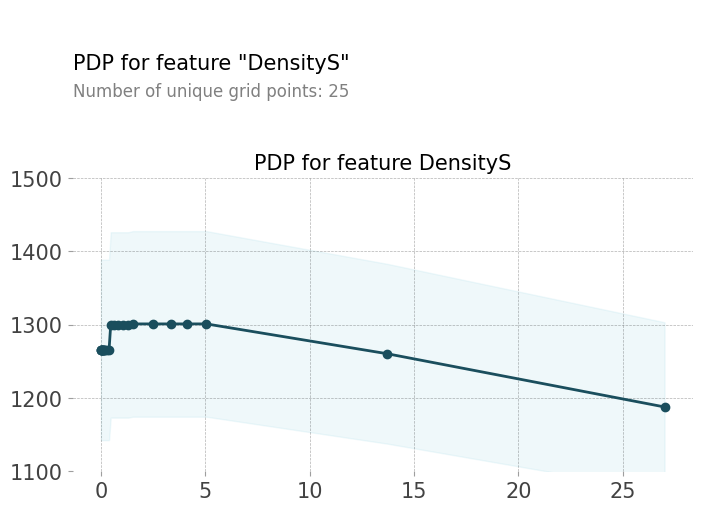

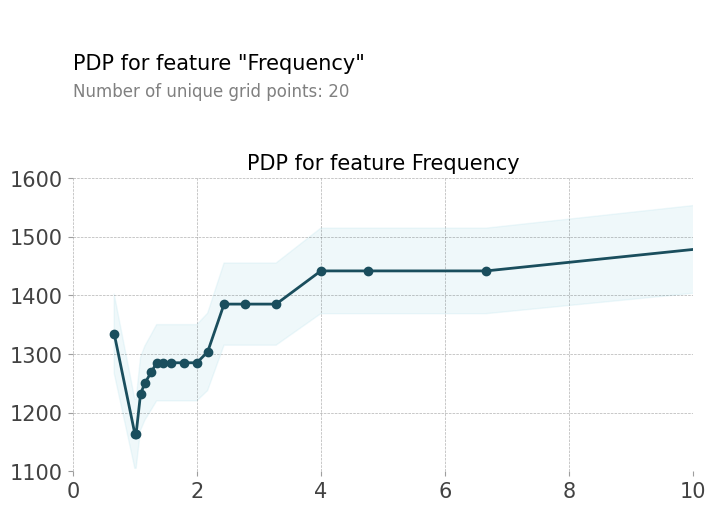

In [143]:

#Fine-tunning for stochastic GBM 

#%%capture 

params_dt={
    'feature_fraction':[0.3, 0.3, 0.8, 1]
}

GEs=[]
runtimes=[]

for i in params_dt['feature_fraction']:
  Ge, time=HyperpTrialGBM(nfolds=5, X=claims_train2_X, y=claims_train2_y,
                          l_rate=Optimal[0],
                          n_est=Optimal[1], max_d=Optimal[2], frac_ft=i)
  GEs.append(GE)
  runtimes.append(round(time.total_seconds(),2))

for i in range(len(params_dt['feature_fraction'])):
  print(
      "Total run time for optimal GBM with feature_fraction = {} was:"\
      .format(params_dt['feature_fraction'][i]), runtimes[i], "while eval GE is:", round(GEs[i], 6))
pd.options.display.float_format='{:,.2f}'.format 
sTunningResults=pd.DataFrame({'Feature fraction':params_dt['feature_fraction'],
                              'Validation GE':GEs, 'Run Time (secs.)':runtimes})
sTunningResults=sTunningResults.set_index(['Feature fraction'])
sTunningResults['Validation GE']=sTunningResults['Validation GE'].map('{:,.6f}'.format)

sTunningResults 

# Partial Dependency Plots 
def PDPlot(model, feature, trainset, xlims = None, ylims = None, n_grid = 25):
  pdp_dist = pdp.pdp_isolate(model=model, dataset=trainset
  , model_features=trainset.columns, num_grid_points = n_grid 
  , feature=feature)
  fig, axes = pdp.pdp_plot(pdp_dist, feature, center = False, plot_params = params, figsize = (8 
  , 6))
  axes['pdp_ax'].set_ylim(ylims)
  axes['pdp_ax'].set_xlim(xlims)
  axes['pdp_ax'].set_xlabel("", fontsize=15)
  axes['pdp_ax'].set_title(f'PDP for feature {feature}', fontsize=15)
  axes['pdp_ax'].tick_params(axis='both',  labelsize=15)
  
PDPdriverage = PDPlot(GBMmodelS, 'DriverAge', claims_train2_X, ylims = [1100, 1500])
PDPcarage = PDPlot(GBMmodelS, 'CarAge', claims_train2_X, ylims = [1000, 1500])
PDPdensityS = PDPlot(GBMmodelS, 'DensityS', claims_train2_X, ylims = [1100, 1500])
PDPdensityS = PDPlot(GBMmodelS, 'Frequency', claims_train2_X, ylims = [1100, 1600], xlims = [0, 10 
], n_grid = 29)



In [144]:
#loss costing with GBM models 

freqs_test.shape 

def PricingGBM(test, weights, freqGBM, sevGBM): 
  # The GBMs must make their predictions for both frequencies and severities
  testF=test[freqGBM.feature_name_]
  freq_pred=freqGBM.predict(testF)
  freq_pred=freq_pred*weights 

  testS=test[sevGBM.feature_name_]
  sev_pred=sevGBM.predict(testS)
  #Once we have the predictions, we can easily compute the pure premium 
  pure_premium=freq_pred*sev_pred
  return freq_pred, sev_pred, pure_premium 

# We aggregate the loss incurred by each policy, so that we can join this information with the fre 
# qs table
AggregatedLoss=claims1.groupby(level=0).sum()['ClaimAmount']
#We initiate the PremiumAnalysis table, were the summary information will be compiled 
PremAnalysisGBM=freqs_test[['ClaimNb', 'Exposure']].copy()
#We perform the joint with PremiumAnalysis as the target 
PremAnalysisGBM=pd.merge(PremAnalysisGBM, AggregatedLoss, how='left', left_index=True, right_index=True)
PremAnalysisGBM.fillna(0, inplace=True)
PremAnalysisGBM=PremAnalysisGBM.rename(columns={'ClaimAmount':'Aggregated Loss'})
PremAnalysisGBM['Pred. Frequency'], PremAnalysisGBM['Pred. Severity'], PremAnalysisGBM['Pure Premium']=\
PricingGBM(freqs_test, 
           weights=freqs_test2_w, 
           freqGBM=GBMmodel0,
           sevGBM=GBMmodelS1)
PremAnalysisGBM['Anual Pure Prem.']=PremAnalysisGBM['Pure Premium']/PremAnalysisGBM['Exposure']
PremAnalysisGBM.describe()
PremAnalysisGBM.iloc[15:23] 

seed=2303 
PremAnalysisGBM.iloc[[seed]][['Pred. Frequency', 'Pred. Severity', 'Pure Premium', 'Anual Pure Prem.']]





,Pred. Frequency,Pred. Severity,Pure Premium,Anual Pure Prem.
PolicyID,,,,
274731,0.02,"1,311.69",21.70,86.78


In [145]:
PremAnalysisGLM.shape

(82606, 7)

In [146]:
#Final comparative analysis between GLMs and GBM models 

#Predictive performance 


pd.options.display.float_format='{:,.6f}'.format 
PerformanceTable=pd.DataFrame({'Model Type': modeltype, 'Model Desc.': modeldesc,
                               'GE type':GEtype, 'Model Train GE':modeltrainGE, 'Model test GE': modeltestGE})
PerformanceTable=PerformanceTable.set_index(['Model Type', 'Model Desc.'])
PerformanceTable.sort_index(level=0)

#Premium Analysis 


pd.options.display.float_format='{:,.2f}'.format
CompStatistics=pd.DataFrame({'GLM':PremAnalysisGLM.sum().values, 'GBM':PremAnalysisGBM.sum().values},
                            index=PremAnalysisGLM.sum().index)
LossRatio=CompStatistics.loc[['Pure Premium']].values/CompStatistics.loc[['Aggregated Loss']]
LossRatio=LossRatio.rename(index={'Aggregated Loss':'Loss Ratio'})
CompStatistics=CompStatistics.drop('Pred. Severity')
CompStatistics.loc['ClaimNb']=CompStatistics.loc['ClaimNb'].map('{:,.0f}'.format)
CompStatistics.loc['Aggregated Loss']=CompStatistics.loc['Aggregated Loss'].map('{:,.2f} euro'.format)
CompStatistics.loc['Pure Premium']=CompStatistics.loc['Pure Premium'].map('{:,.2f} euro'.format)
CompStatistics.loc['Anual Pure Prem.']=CompStatistics.loc['Anual Pure Prem.'].map('{:,.2f} euro'.format)


CompStatistics=CompStatistics.append(LossRatio)
CompStatistics.loc['Loss Ratio']=CompStatistics.loc['Loss Ratio'].map('{:,.2%}'.format)
CompStatistics 



,GLM,GBM
ClaimNb,"3,247","3,247"
Exposure,"46,213.79","46,213.79"
Aggregated Loss,"4,150,990.00 euro","4,150,990.00 euro"
Pred. Frequency,"3,154.57","3,152.81"
Pure Premium,"4,027,716.35 euro","4,032,672.31 euro"
Anual Pure Prem.,"7,504,680.89 euro","7,613,093.52 euro"
Loss Ratio,97.03%,97.15%


In [148]:
#comparative Premium tables 

ComparativePrem=PremAnalysisGLM[['ClaimNb', 'Exposure', 'Aggregated Loss', 'Pure Premium']]
ComparativePrem=ComparativePrem.rename(columns={'Pure Premium':'GLM Premium'})
ComparativePrem['GBM Premium']=PremAnalysisGBM['Pure Premium']
ComparativePrem[15:23]
pd.options.display.float_format='{:,.2f}'.format 
ComparativePrem.describe()[['Aggregated Loss', 'GLM Premium', 'GBM Premium']]
train_fr=freqs_train['ClaimNb'].sum()/freqs_train['Exposure'].sum()
print('The empirical frequency on train set was {}'.format(round(train_fr, 6))) 
test_fr = freqs_test['ClaimNb'].sum()/freqs_test['Exposure'].sum()
print('The empirical frequency on test set was {}'.format(round(test_fr, 6))) 
print('The difference amounts to a {:,.3%}'.format(round(test_fr/train_fr-1, 6))) 
train_cl = claims_train['ClaimAmount'].mean()
test_cl = claims_test['ClaimAmount'].mean()
print('The average severity on train set was {:,.2f}€'.format(round(train_cl, 6)))
print('The average severity on test set was {:,.2f}€'.format(round(test_cl, 6)))
print('The difference amounts to a {:,.3%}'.format(round(test_cl/train_cl-1, 6)))

The empirical frequency on train set was 0.068202
The empirical frequency on test set was 0.07026
The difference amounts to a 3.018%
The average severity on train set was 1,281.16€
The average severity on test set was 1,278.41€
The difference amounts to a -0.215%


101.41295660983981

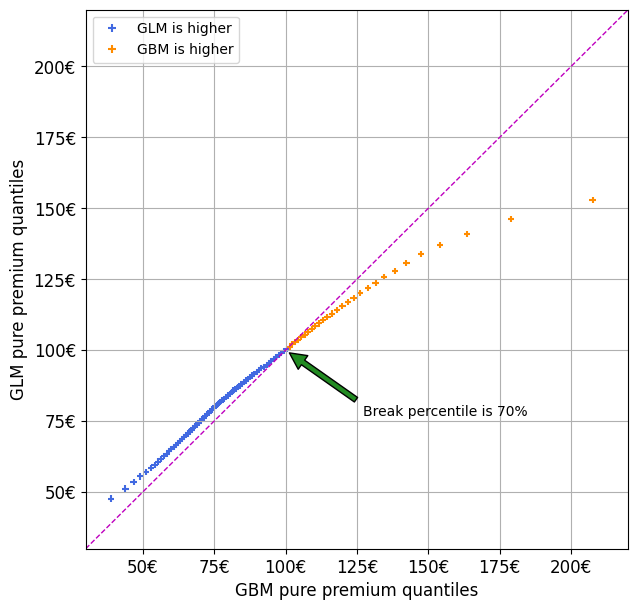

In [150]:
#Quantile analysis 

import statsmodels.api as sm 
import pylab as py 

quants=np.array(range(1,100,1))/100

GLMquants=[np.quantile(PremAnalysisGLM['Anual Pure Prem.'], i) for i in quants]
GBMquants=[np.quantile(PremAnalysisGBM['Anual Pure Prem.'], i) for i in quants]


#QQplot 

higher = [1 if gbm > glm else 0 for glm, gbm in zip(GLMquants, GBMquants)] 
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['royalblue', 'darkorange']) 
classes = ['GLM is higher', 'GBM is higher']
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
scat = ax.scatter(x = GBMquants, y = GLMquants, s = 20, c = higher, cmap = colormap, marker = "+")
ax.yaxis.set_major_formatter('{x:1.0f}€')
ax.xaxis.set_major_formatter('{x:1.0f}€')
ax.grid(True)
ax.set_xlim([30, 220])
ax.set_ylim([30, 220])
ax.plot([0,220], [0, 220], '--', lw=1, color = 'm')
ax.set_xlabel("GBM pure premium quantiles", fontsize=12)
ax.set_ylabel("GLM pure premium quantiles", fontsize=12)
ax.annotate('Break percentile is {}%'.format(len(GLMquants)-sum(higher)), xy=(100, 100), xytext=(127, 77),
arrowprops=dict(facecolor='forestgreen', shrink=0.05))
ax.legend(handles=scat.legend_elements()[0], labels=classes) 
GBMquants[len(GLMquants)-sum(higher)]

Text(0, 0.5, 'GLM anualized pure premium')

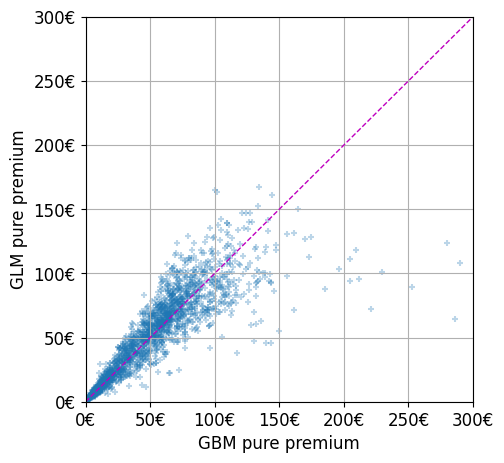

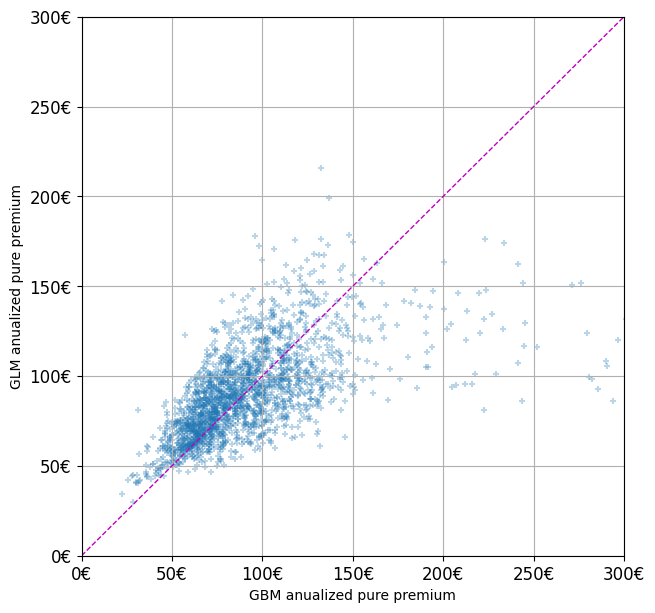

In [152]:
# Premium scatter plot 
premiums = ComparativePrem.sample(2000) 
upperlim = 300
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(x = premiums['GBM Premium'], y = premiums['GLM Premium'], alpha=0.3, s = 15, marker = "+")
ax.yaxis.set_major_formatter('{x:1.0f}€') 
ax.xaxis.set_major_formatter('{x:1.0f}€') 
ax.grid(True)
ax.set_xlim([0, upperlim]) 
ax.set_ylim([0, upperlim])
ax.plot([0,upperlim], [0, upperlim], '--', lw=1, color = 'm')

ax.set_xlabel("GBM pure premium", fontsize=12) 
ax.set_ylabel("GLM pure premium", fontsize=12)
upperlim = 300
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
ax.scatter(x = premiums['GBM Premium']/premiums['Exposure'], y = premiums['GLM Premium']/premiums[ 
'Exposure'], alpha=0.3, s = 15, marker = "+")
ax.yaxis.set_major_formatter('{x:1.0f}€')
ax.xaxis.set_major_formatter('{x:1.0f}€')
ax.grid(True)
ax.set_xlim([0, upperlim])
ax.set_ylim([0, upperlim])
ax.plot([0,upperlim], [0, upperlim], '--', lw=1, color = 'm')
ax.set_xlabel("GBM anualized pure premium", fontsize=10)
ax.set_ylabel("GLM anualized pure premium", fontsize=10)